In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap

In [2]:
# Read Excel file
df = ('irs2018subset.xlsx') #We tell the program where the data set is 
df2 = pd.read_excel(df) #We tell the program to read our data set file
df2.head() #We tell the program to to show us the heads of our data 

,ZIP\ncode [1],Size of adjusted gross income,Number of \nindividuals [2],Number of dependents,Adjusted gross income (AGI) [6],Total Income Amount
0,0.0,Total,17260550.0,5256960.0,887473952.0,897744825.0
1,0.0,"$1 under $25,000",4289760.0,1269570.0,39405590.0,40131681.0
2,0.0,"$25,000 under $50,000",3878510.0,1246870.0,80799782.0,81754050.0
3,0.0,"$50,000 under $75,000",2417530.0,680400.0,83947467.0,84832564.0
4,0.0,"$75,000 under $100,000",1726310.0,476400.0,75584247.0,76239550.0


In [3]:
# Rename columns
df2 = df2.rename(columns={'ZIP\ncode [1]': 'Zip_Code', 'Size of adjusted gross income': 'Size_of_AGI', 'Number of \nindividuals [2]': 'Number_of_Individuals', 'Number of dependents': 'Number_of_dependents', 'Adjusted gross income (AGI) [6]': 'Average_AGI', 'Total Income Amount': 'Average_Income'})
df2.head(5)

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_AGI,Average_Income
0,0.0,Total,17260550.0,5256960.0,887473952.0,897744825.0
1,0.0,"$1 under $25,000",4289760.0,1269570.0,39405590.0,40131681.0
2,0.0,"$25,000 under $50,000",3878510.0,1246870.0,80799782.0,81754050.0
3,0.0,"$50,000 under $75,000",2417530.0,680400.0,83947467.0,84832564.0
4,0.0,"$75,000 under $100,000",1726310.0,476400.0,75584247.0,76239550.0


In [4]:
# Remove the 'Average_AGI' column from dataframe.
df3 = df2[['Zip_Code', 'Size_of_AGI', 'Number_of_Individuals', 'Number_of_dependents', 'Average_Income']]
df3.head()

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
0,0.0,Total,17260550.0,5256960.0,897744825.0
1,0.0,"$1 under $25,000",4289760.0,1269570.0,40131681.0
2,0.0,"$25,000 under $50,000",3878510.0,1246870.0,81754050.0
3,0.0,"$50,000 under $75,000",2417530.0,680400.0,84832564.0
4,0.0,"$75,000 under $100,000",1726310.0,476400.0,76239550.0


In [5]:
# Find unique values in 'Size of adjusted gross income'
df3['Size_of_AGI'].unique()

array(['Total', '$1 under $25,000', '$25,000 under $50,000',
       '$50,000 under $75,000', '$75,000 under $100,000',
       '$100,000 under $200,000', '$200,000 or more', nan], dtype=object)

In [6]:
# Replace all unique values in 'Size of adjusted gross income' with better labels.
df3['Size_of_AGI'].replace(['$1 under $25,000', '$25,000 under $50,000',
       '$50,000 under $75,000', '$75,000 under $100,000',
       '$100,000 under $200,000', '$200,000 or more'], ['1.00 - 24,999.99', 
       '25,000.00 - 49,999.99', '50,000.00 - 74,999.99', '75,000.00 - 99,999.99', 
       '100,000.00 - 199,999.99', '200,000.00+'], inplace=True )
df3.head(25)

/opt/tljh/user/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
0,0.0,Total,17260550.0,5256960.0,897744825.0
1,0.0,"1.00 - 24,999.99",4289760.0,1269570.0,40131681.0
2,0.0,"25,000.00 - 49,999.99",3878510.0,1246870.0,81754050.0
3,0.0,"50,000.00 - 74,999.99",2417530.0,680400.0,84832564.0
4,0.0,"75,000.00 - 99,999.99",1726310.0,476400.0,76239550.0
5,0.0,"100,000.00 - 199,999.99",3245060.0,993140.0,190930107.0
6,0.0,"200,000.00+",1703380.0,590580.0,423856873.0
7,NaN,NaN,NaN,NaN,NaN
8,10001.0,NaN,21760.0,3350.0,2942370.0
9,10001.0,"1.00 - 24,999.99",4390.0,800.0,44221.0


In [7]:
df3.shape

(12287, 5)

In [8]:
# Show only subset where zip code does not have a null value.
# Note: Ex. dataset = dataset[dataset["NEW YORK"].notna()]
df4 = df3.dropna()
df4.shape

(9217, 5)

In [9]:
# Show subset where zip code does not have 'Total' value and show only NYC zip codes. 
# Ex. dataset = (dataset.iloc[:299]).append(dataset.iloc[450:])
# Set 'Zip Code' as index before showing subset of NYC zip codes.
# df4.set_index('Zip Code') 
# This method failed.

In [10]:
# Show subset of dataframe from indexed zipcode 10001 to the end of the table. 
# This method failed.
# df4 = (df4.loc[10001:10007]).append(df4.loc[10009:10041]).append(df4.loc[10044:10045]).append(df4.loc[10048]).append(df4.loc[10055]).append(df4.loc[10060]).append(df4.loc[10069]).append(df4.loc[10090]).append(df4.loc[10095]).append(df4.loc[10098:10099]).append(df4.loc[10103:10107]).append(df4.loc[10110:10112]).append(df4.loc[10115]).append(df4.loc[10118:10123]).append(df4.loc[10128]).append(df4.loc[10151:10155]).append(df4.loc[10158]).append(df4.loc[10161:10162]).append(df4.loc[10165:10178]).append(df4.loc[10199]).append(df4.loc[10270:10271]).append(df4.loc[10278:10282]).append(df4.loc[10301:10312]).append(df4.loc[10314]).append(df4.loc[11004]).append(df4.loc[11101:11109]).append(df4.loc[11201]).append(df4.loc[11203:11239]).append(df4.loc[11241:11243]).append(df4.iloc[11249]).append(df4.loc[11252]).append(df4.loc[11256]).append(df4.loc[11351]).append(df4.loc[11354:11375]).append(df4.loc[11377:11379]).append(df4.loc[11385]).append(df4.loc[11411:11423]).append(df4.loc[11426:11430]).append(df4.loc[11432:11436]).append(df4.loc[11691:11694]).append(df4.loc[11697])

In [11]:
# Drop row with total at the top of table.
df4 = df4.drop([0])

In [12]:
df4.head(15)

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
1,0.0,"1.00 - 24,999.99",4289760.0,1269570.0,40131681.0
2,0.0,"25,000.00 - 49,999.99",3878510.0,1246870.0,81754050.0
3,0.0,"50,000.00 - 74,999.99",2417530.0,680400.0,84832564.0
4,0.0,"75,000.00 - 99,999.99",1726310.0,476400.0,76239550.0
5,0.0,"100,000.00 - 199,999.99",3245060.0,993140.0,190930107.0
6,0.0,"200,000.00+",1703380.0,590580.0,423856873.0
9,10001.0,"1.00 - 24,999.99",4390.0,800.0,44221.0
10,10001.0,"25,000.00 - 49,999.99",3340.0,680.0,93686.0
11,10001.0,"50,000.00 - 74,999.99",2570.0,330.0,130591.0
12,10001.0,"75,000.00 - 99,999.99",1900.0,180.0,136318.0


In [13]:
df4.shape

(9216, 5)

In [14]:
# df4['Zip Code' == 10001.0] # This did not work
# df.iloc[[index]] # This did not work
# This command shows the first and last NYC zip code in the table.
# df4.iloc[[6,2099]] This shows specific Zip Codes

In [15]:
# df4[(df4['Zip Code'] >= 10001) & (df4['Zip Code'] <= 10007)] # This works to show a range.

In [16]:
# Try to have multiple conditionals and test conflicts. 
# Having & between four conditionals fails to produce output, but replacing it with | results in output.
# QUESTION 1: By using order between the two pairs of conditionals, does it show both ranges or just one or the other?
# Answer: It shows both ranges. Note: For & both statements need to be true that is why & operator will not work to show both ranges. | will work here.
# df4[(df4['Zip Code'] >= 10001) & (df4['Zip Code'] <= 10007) | (df4['Zip Code'] >= 10009) & (df4['Zip Code'] <= 10041)]

In [17]:
# Alternate method tested to slice ranges using append between pairs of conditionals.
# df4[(df4['Zip Code'] >= 10001) & (df4['Zip Code'] <= 10007)].append(df4[(df4['Zip Code'] >= 10009) & (df4['Zip Code'] <= 10041)])

In [18]:
# QUESTION 3: How do we sort dataframe by the highest value in a particular column? 
# Answer: data.sort_value('column name', ascending=False)
# This will help me identify the list of worst restaurants by score or number of violations.

In [19]:
# Show subset of NYC Zip Codes (using conditionals to filter through all NYS Zip Codes).
# Missing or Deleted Zip Codes 10045, 10048, 10055, 10060, 10090, 10098, 10099, 10103, 10104, 10105, 10106, 10107, 10110, 10111, 10112, 10115, 10118, 10119, 10120, 10121, 10122, 10123, 10151, 10152, 10153, 10154, 10155, 10158, 10161, 10162, 10165, 10166, 10167, 10168, 10169, 10170, 10171, 10172, 10173, 10174, 10175, 10176, 10177, 10178, 10199, 10270, 10271, 10278, 10279, 10282, 10311, 11241, 11242, 11243, 11249, 11252, 11256, 11351, 11359, 11371, 11430
# Use > number before & < number after as the pair conditional to add range for a single Zip Code. Ex. for 10044 use (df4['Zip Code'] > 10043) & (df4['Zip Code'] < 10045).
# UPDATE (AFTER DROP DID NOT WORK): Delete rows with asterisks (represented as 0.0) in dataframe: 10006, 10162, 10454, 10474, 11239
df5 = df4[(df4['Zip_Code'] >= 10001) & (df4['Zip_Code'] < 10006) | (df4['Zip_Code'] > 10006) & (df4['Zip_Code'] <= 10007) | (df4['Zip_Code'] >= 10009) & (df4['Zip_Code'] <= 10041) | (df4['Zip_Code'] > 10043) & (df4['Zip_Code'] < 10045) | (df4['Zip_Code'] > 10068) & (df4['Zip_Code'] < 10070) | (df4['Zip_Code'] > 10089) & (df4['Zip_Code'] < 10091) | (df4['Zip_Code'] > 10094) & (df4['Zip_Code'] < 10096) | (df4['Zip_Code'] >= 10098) & (df4['Zip_Code'] <= 10099) | (df4['Zip_Code'] >= 10103) & (df4['Zip_Code'] <= 10107) | (df4['Zip_Code'] >= 10110) & (df4['Zip_Code'] <= 10112) | (df4['Zip_Code'] > 10114) & (df4['Zip_Code'] < 10116) | (df4['Zip_Code'] >= 10118) & (df4['Zip_Code'] <= 10123) | (df4['Zip_Code'] > 10127) & (df4['Zip_Code'] < 10129) | (df4['Zip_Code'] >= 10151) & (df4['Zip_Code'] <= 10155) | (df4['Zip_Code'] > 10157) & (df4['Zip_Code'] < 10159) | (df4['Zip_Code'] >= 10165) & (df4['Zip_Code'] <= 10178) | (df4['Zip_Code'] > 10198) & (df4['Zip_Code'] < 10200) | (df4['Zip_Code'] >= 10270) & (df4['Zip_Code'] <= 10271) | (df4['Zip_Code'] >= 10278) & (df4['Zip_Code'] <= 10282) | (df4['Zip_Code'] >= 10301) & (df4['Zip_Code'] <= 10312) | (df4['Zip_Code'] > 10313) & (df4['Zip_Code'] < 10315) | (df4['Zip_Code'] >= 10451) & (df4['Zip_Code'] <= 10453) | (df4['Zip_Code'] >= 10455) & (df4['Zip_Code'] < 10474) | (df4['Zip_Code'] > 10474) & (df4['Zip_Code'] <= 10475) | (df4['Zip_Code'] > 11003) & (df4['Zip_Code'] < 11005) | (df4['Zip_Code'] >= 11101) & (df4['Zip_Code'] <= 11109) | (df4['Zip_Code'] > 11200) & (df4['Zip_Code'] < 11202) | (df4['Zip_Code'] >= 11203) & (df4['Zip_Code'] < 11239) | (df4['Zip_Code'] >= 11241) & (df4['Zip_Code'] <= 11243) | (df4['Zip_Code'] > 11248) & (df4['Zip_Code'] < 11250) | (df4['Zip_Code'] > 11251) & (df4['Zip_Code'] < 11253) | (df4['Zip_Code'] > 11255) & (df4['Zip_Code'] < 11257) | (df4['Zip_Code'] > 11350) & (df4['Zip_Code'] < 11352) | (df4['Zip_Code'] >= 11354) & (df4['Zip_Code'] <= 11375) | (df4['Zip_Code'] >= 11377) & (df4['Zip_Code'] <= 11379) | (df4['Zip_Code'] > 11384) & (df4['Zip_Code'] <= 11386) | (df4['Zip_Code'] >= 11411) & (df4['Zip_Code'] <= 11423) | (df4['Zip_Code'] >= 11426) & (df4['Zip_Code'] <= 11430) | (df4['Zip_Code'] >= 11432) & (df4['Zip_Code'] <= 11436) | (df4['Zip_Code'] >= 11691) & (df4['Zip_Code'] <= 11694) | (df4['Zip_Code'] > 11696) & (df4['Zip_Code'] < 11698)]

In [20]:
# Number of rows and columns of NYC Zip Codes
df5.shape

(1026, 5)

In [21]:
# Find Zip Codes to delete for having asterisks in 'Zip Code'. When comparing excel table to python, it appears the asterisks were converted to 0.0 in dataframe.
# Notes: df.column.unique() did not work to help id unique characters because column name has space.
# Update: To check if there are any asterisks remaining.
df5[df5['Zip_Code'] == 0.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income


In [22]:
# Find other Zip Codes to delete for having asterisks in 'Size of adjusted gross income'.
# Update: To check if there are any asterisks remaining.
df5[df5['Size_of_AGI'] == 0.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income


In [23]:
# Find other Zip Codes to delete for having asterisks in 'Number of Individuals'.
# Update: To check if there are any asterisks remaining.
df5[df5['Number_of_Individuals'] == 0.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income


In [24]:
# Find other Zip Codes to delete Zip Codes for having asterisks in 'Number of dependents'.
# Update: To check if there are any asterisks remaining.
df5[df5['Number_of_dependents'] == 0.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income


In [25]:
# Find other Zip Codes to delete for having asterisks in 'Average Adjusted Gross Income'.
# Update: To check if there are any asterisks remaining.
df5[df5['Average_Income'] == 0.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income


In [26]:
# Update: No longer shows
# Find other Zip Codes to delete for having asterisks in 'Average Income Amount'.
# Update: To check if there are any asterisks remaining.
# df5[df5['Average_Income'] == 0.0]

In [27]:
# Delete rows based on the columns that were found to have asterisks represented as 0.0. Since all rows with asterisks share the characteristics of have the 'Number of Dependents' being affected. We only need to drop Zip Codes associated with 0.0 for 'Number of Dependents'.
# df = df[df.line_race != 0] Ex. to delete rows with this value in the column.
# df5[df5.Number_of_dependents != 0.0] 
# This only delete specific rows not all Zip Codes associated.

In [28]:
# Delete NYC Zip Codes 10006, 10162, 10454, 10474, 11239 that have asterisks.
# df5[df5.Zip_Code != [10006, 10162, 10454, 10474, 11239]] # This does not work.
# Ex. # df4 = (df4.loc[10001:10007]).append(df4.loc[10009:10041])
# df6 = (df5[df5.Zip_Code != 10006]).append(df5[df5.Zip_Code != 10162]).append(df5[df5.Zip_Code != 10454]).append(df5[df5.Zip_Code != 10474]).append(df5[df5.Zip_Code != 11239])
# This does not work

In [29]:
# Delete NYC Zip Codes 10006, 10162, 10454, 10474, 11239 that have asterisks.
# df5.drop([49,50,51,52,53,54,345,346,347,348,349,350,489,490,491,492,493,494,649,650,651,652,653,654,2097,2098,2099,2100,2101,2102], inplace=True)
# This does not work. So I should filter further.

In [30]:
# Check for null values. There are none. So it is clean.
df5.isna().sum()

Zip_Code                 0
Size_of_AGI              0
Number_of_Individuals    0
Number_of_dependents     0
Average_Income           0
dtype: int64

In [31]:
# Tabulate useful data.
# 3 Zip Codes that has the highest number of higher earning individuals (50k and above) # Completed
# 3 Zip Codes with the highest number of individuals for each bracket. # Completed
# 3 Zip Codes with the highest earning income individuals overall.
# 3 Zip Codes with the highest earning Income for each bracket.

In [32]:
# Note: Tabulate useful data with groupby 'Zip Code' and 'Size of adjusted gross income' to find total sum of 'Number of individuals'.
# Note: Use ascending attribute to find top 10 'Number of Individuals' per Zip Code.
# Note: Ex. df.groupby(['Fruit','Name']).sum() to group by columns to find sum.
# Note: df5.groupby(['Zip_Code', 'Size_of_adjusted_gross_income'])['Number_of_Individuals'].sum() # Shows number of 'Number of Individuals' for each row.
# Note: df5.groupby(['Zip_Code'])['Number_of_Individuals'].sum() # Find sum of 'Number of Individuals' for each 'Zip Code'.
# Note: .sort_values(ascending=False) rearranges values from highest to lowest.
# Note: .head(10) is used to limit range to view to first 10 items.

# Top 3 Zip Codes with highest number of taxpaying individuals.
top3_most_taxpayers_per_zipcode = df5.groupby(['Zip_Code'])['Number_of_Individuals'].sum().sort_values(ascending=False).head(3)
top3_most_taxpayers_per_zipcode

Zip_Code
11220.0    106310.0
11368.0     96980.0
11373.0     95100.0
Name: Number_of_Individuals, dtype: float64

Text(0.5, 0, 'Zip Code')

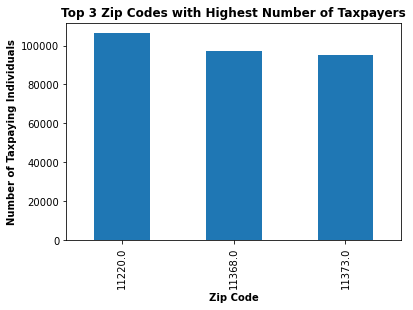

In [33]:
# Bar chart of top 3 zip codes with most number of taxpaying individuals.

# Failed code: # plt.bar('Zip_Code','Number_of_Individuals') # (xaxislabel,yaxislabel) # plt.title('Overall Top 10 Most populated Zip Codes') # (titlelabel) # plt.xlabel('Zip Code') # (xaxislabel) # plt.ylabel('Number of Individuals') # (yaxislabel) # plt.show() # call matplotlib to show chart)

# Plot bar chart of top 3 zip codes with most taxpayers. # pd.dataframe.plot.bar(x,y)
top3_most_taxpayers_per_zipcode.plot.bar(x='Zip_Code', y='Number_of_Individuals')
plt.title('Top 3 Zip Codes with Highest Number of Taxpayers', fontweight='bold')
plt.ylabel('Number of Taxpaying Individuals', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [34]:
# Set Zip codes to index.
df6 = df5.set_index('Zip_Code')

# Show Pie chart of each division of taxpayers by wealth for top 3 Zip Codes that have highest number of taxpayers.

In [35]:
df5[df5['Zip_Code'] == 11220.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
1953,11220.0,"1.00 - 24,999.99",59290.0,17450.0,445650.0
1954,11220.0,"25,000.00 - 49,999.99",28660.0,11370.0,420544.0
1955,11220.0,"50,000.00 - 74,999.99",8190.0,2690.0,260501.0
1956,11220.0,"75,000.00 - 99,999.99",3830.0,1150.0,166023.0
1957,11220.0,"100,000.00 - 199,999.99",4950.0,1590.0,285314.0
1958,11220.0,"200,000.00+",1390.0,490.0,188072.0


In [36]:
df5[df5['Zip_Code'] == 11368.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
2209,11368.0,"1.00 - 24,999.99",42560.0,15090.0,319769.0
2210,11368.0,"25,000.00 - 49,999.99",31680.0,13450.0,502758.0
2211,11368.0,"50,000.00 - 74,999.99",13080.0,5280.0,354828.0
2212,11368.0,"75,000.00 - 99,999.99",5450.0,2100.0,200072.0
2213,11368.0,"100,000.00 - 199,999.99",3920.0,1410.0,205870.0
2214,11368.0,"200,000.00+",290.0,100.0,41854.0


In [37]:
df5[df5['Zip_Code'] == 11373.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
2241,11373.0,"1.00 - 24,999.99",38660.0,9890.0,312752.0
2242,11373.0,"25,000.00 - 49,999.99",28800.0,10430.0,484755.0
2243,11373.0,"50,000.00 - 74,999.99",13110.0,4310.0,396247.0
2244,11373.0,"75,000.00 - 99,999.99",6660.0,2110.0,268006.0
2245,11373.0,"100,000.00 - 199,999.99",6800.0,2160.0,381555.0
2246,11373.0,"200,000.00+",1070.0,330.0,128376.0


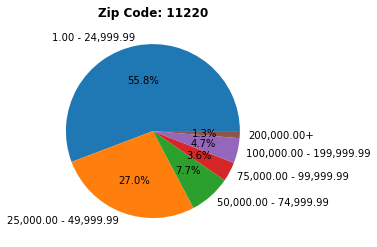

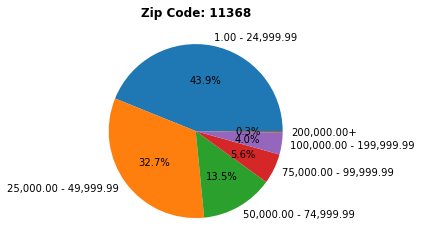

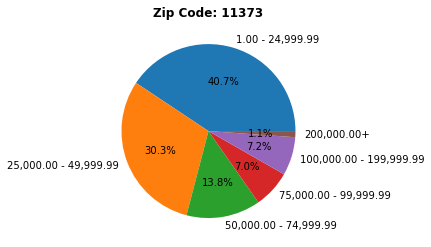

In [38]:
# Pie Charts for Top 3 Zip Codes with Highest Number of Taxpayers divided by income bracket.
# I did not know how to write code to translate a dataframe into a pie chart. ...
# ... So, I created a pie chart manually with the corresponding values for the top 3 zip codes.

# Note: autopct='%1.0f%%' results in rounded percentages for each section of pie.
# Note: autopct='%.1f%%' shows one decimal place.
# Note: autopct='%.2f%%' shows two decimal places.

# Corresponding Pie labels for each pie chart.
pie_label = ["1.00 - 24,999.99", "25,000.00 - 49,999.99", "50,000.00 - 74,999.99", "75,000.00 - 99,999.99", "100,000.00 - 199,999.99", "200,000.00+"]

# Number of Individuals (Taxpayers) for Zip Code: 11220
num_taxpayers_place1 = np.array([59290.0, 28660.0, 8190.0, 3830.0, 4950.0, 1390.0])

# Number of Individuals (Taxpayers) for Zip Code: 11368 with corresponding labels
num_taxpayers_place2 = np.array([42560.0, 31680.0, 13080.0, 5450.0, 3920.0, 290.0])

# Number of Individuals (Taxpayers) for Zip Code: 11373 with corresponding labels
num_taxpayers_place3 = np.array([38660.0, 28800.0, 13110.0, 6660.0, 6800.0, 1070.0])

# Plot pie charts
plt.title('Zip Code: 11220', fontweight = 'bold')
plt.pie(num_taxpayers_place1, labels = pie_label, autopct='%.1f%%')
plt.show()

plt.title('Zip Code: 11368', fontweight = 'bold')
plt.pie(num_taxpayers_place2, labels = pie_label, autopct='%.1f%%')
plt.show()

plt.title('Zip Code: 11373', fontweight = 'bold')
plt.pie(num_taxpayers_place3, labels = pie_label, autopct='%.1f%%')
plt.show()


# Measuring Top 3 'Zip Codes' with highest 'Number of (tax paying) Individuals' for each bracket.

In [39]:
# Failed code:
# Note: df5.groupby(['Size_of_adjusted_gross_income'])['Zip_Code', 'Average_Adjusted_Gross_Income'].sort_values(ascending=False).head(10) # This did not work
# Note: bracket1 = df5[df5['Size_of_adjusted_gross_income'] == '1.00 - 24,999.99'].sort_values(by=str, ascending=False).head(10) # This does not work.
# Note: df5.sort_values(by=['Size_of_adjusted_gross_income'], ascending=False).head() # This does not work.

# Failed code:
# bracket1_numberofindividuals = df6[df6['Size_of_adjusted_gross_income'] == '1.00 - 24,999.99']['Number_of_Individuals'].sort_values(ascending=False) # bracket1_numberofindividuals.head(3)

# Not used code: 
# numberofindividuals = df6.groupby(['Zip_Code'])['Number_of_Individuals'].sum().sort_values(ascending=False).head(10)
# numberofdependents = df6.groupby(['Zip_Code'])['Number_of_dependents'].sum().sort_values(ascending=False).head(10)
# populationsize = 

# This shows highest 'Number of (tax paying) Individuals' for 1.00 - 24,999.99 'Size of AGI' bracket.
bracket1_numberofindividuals = df6[df6['Size_of_AGI'] == '1.00 - 24,999.99']['Number_of_Individuals'].sort_values(ascending=False)
bracket1_numberofindividuals.head(3)

Zip_Code
11220.0    59290.0
11355.0    51050.0
11368.0    42560.0
Name: Number_of_Individuals, dtype: float64

Text(0.5, 0, 'Zip Code')

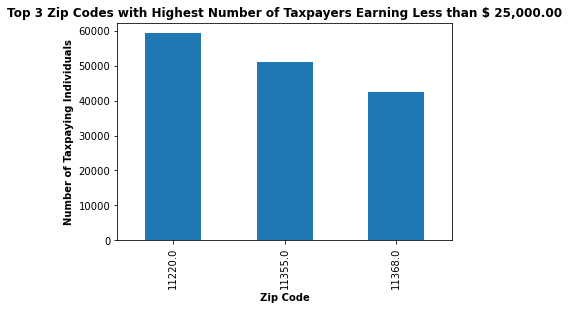

In [40]:
# Plot bar chart of top 3 zip codes with most taxpayers that earn between '1.00 - 24,999.99'. # pd.dataframe.plot.bar(x,y)
# Important: These Zip Codes show the Zip Codes with the highest number of taxpayers that are beneath the Federal Poverty Line (FPL).
bracket1_numberofindividuals.head(3).plot.bar(x='Zip_Code', y='Number_of_Individuals')
plt.title('Top 3 Zip Codes with Highest Number of Taxpayers Earning Less than $ 25,000.00', fontweight='bold')
plt.ylabel('Number of Taxpaying Individuals', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [41]:
# This shows highest 'Number of Individuals' for 25,000.00 - 49,999.99 'Size of AGI' bracket.
bracket2_numberofindividuals = df6[df6['Size_of_AGI'] == '25,000.00 - 49,999.99']['Number_of_Individuals'].sort_values(ascending=False)
bracket2_numberofindividuals.head(3)

Zip_Code
11368.0    31680.0
11373.0    28800.0
11220.0    28660.0
Name: Number_of_Individuals, dtype: float64

Text(0.5, 0, 'Zip Code')

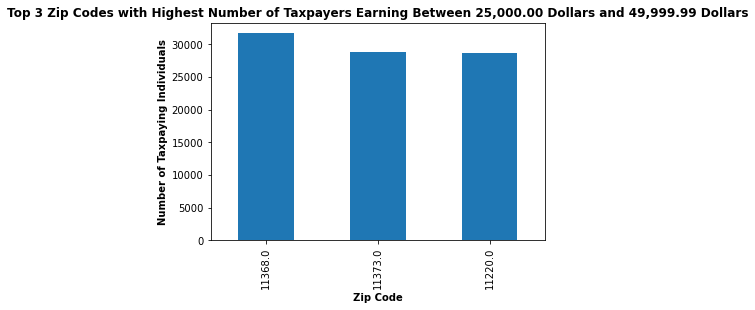

In [42]:
# Plot bar chart of top 3 zip codes with most taxpayers that earn between '25,000.00 - 49,999.99'. # pd.dataframe.plot.bar(x,y)
bracket2_numberofindividuals.head(3).plot.bar(x='Zip_Code', y='Number_of_Individuals')
plt.title('Top 3 Zip Codes with Highest Number of Taxpayers Earning Between 25,000.00 Dollars and 49,999.99 Dollars', fontweight='bold')
plt.ylabel('Number of Taxpaying Individuals', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [43]:
# This shows highest 'Number of Individuals' for 50,000.00 - 74,999.99 'Size of AGI' bracket.
bracket3_numberofindividuals = df6[df6['Size_of_AGI'] == '50,000.00 - 74,999.99']['Number_of_Individuals'].sort_values(ascending=False)
bracket3_numberofindividuals.head(3)

Zip_Code
11385.0    15040.0
11236.0    14550.0
11226.0    14170.0
Name: Number_of_Individuals, dtype: float64

Text(0.5, 0, 'Zip Code')

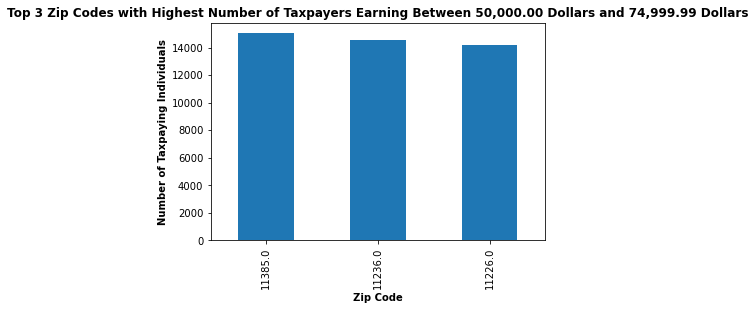

In [44]:
# Plot bar chart of top 3 zip codes with most taxpayers that earn between '50,000.00 - 74,999.99'. # pd.dataframe.plot.bar(x,y)
bracket3_numberofindividuals.head(3).plot.bar(x='Zip_Code', y='Number_of_Individuals')
plt.title('Top 3 Zip Codes with Highest Number of Taxpayers Earning Between 50,000.00 Dollars and 74,999.99 Dollars', fontweight='bold')
plt.ylabel('Number of Taxpaying Individuals', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [45]:
# This shows highest 'Number of Individuals' for 75,000.00 - 99,999.99 'Size of AGI' bracket.
bracket4_numberofindividuals = df6[df6['Size_of_AGI'] == '75,000.00 - 99,999.99']['Number_of_Individuals'].sort_values(ascending=False)
bracket4_numberofindividuals.head(3)

Zip_Code
10314.0    9420.0
11385.0    8860.0
11234.0    8610.0
Name: Number_of_Individuals, dtype: float64

Text(0.5, 0, 'Zip Code')

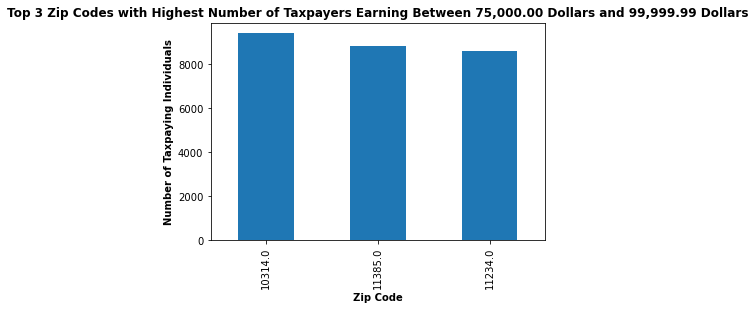

In [46]:
# Plot bar chart of top 10 zip codes with most taxpayers that earn between '75,000.00 - 99,999.99'. # pd.dataframe.plot.bar(x,y)
bracket4_numberofindividuals.head(3).plot.bar(x='Zip_Code', y='Number_of_Individuals')
plt.title('Top 3 Zip Codes with Highest Number of Taxpayers Earning Between 75,000.00 Dollars and 99,999.99 Dollars', fontweight='bold')
plt.ylabel('Number of Taxpaying Individuals', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [47]:
# This shows highest 'Number of Individuals' for 100,000.00 - 199,999.99 'Size of AGI' bracket.
bracket5_numberofindividuals = df6[df6['Size_of_AGI'] == '100,000.00 - 199,999.99']['Number_of_Individuals'].sort_values(ascending=False)
bracket5_numberofindividuals.head(3)

Zip_Code
10314.0    21450.0
10312.0    18940.0
11234.0    16930.0
Name: Number_of_Individuals, dtype: float64

Text(0.5, 0, 'Zip Code')

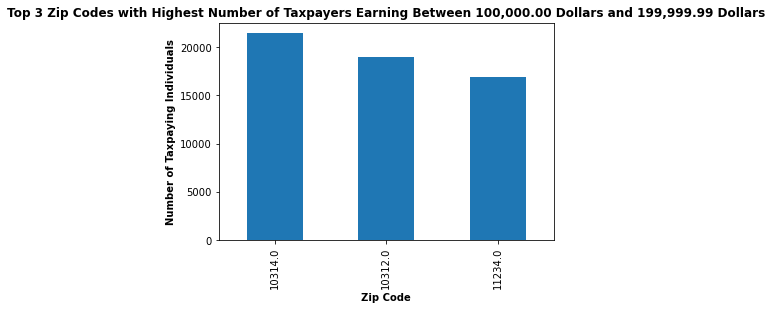

In [48]:
# Plot bar chart of top 10 zip codes with most taxpayers that earn between '100,000.00 - 199,999.99'. # pd.dataframe.plot.bar(x,y)
bracket5_numberofindividuals.head(3).plot.bar(x='Zip_Code', y='Number_of_Individuals')
plt.title('Top 3 Zip Codes with Highest Number of Taxpayers Earning Between 100,000.00 Dollars and 199,999.99 Dollars', fontweight='bold')
plt.ylabel('Number of Taxpaying Individuals', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [49]:
# This shows highest 'Number of Individuals' for 200,000.00+ 'Size of AGI' bracket.
bracket6_numberofindividuals = df6[df6['Size_of_AGI'] == '200,000.00+']['Number_of_Individuals'].sort_values(ascending=False)
bracket6_numberofindividuals.head(3)

Zip_Code
10023.0    23370.0
10024.0    22860.0
10025.0    20780.0
Name: Number_of_Individuals, dtype: float64

Text(0.5, 0, 'Zip Code')

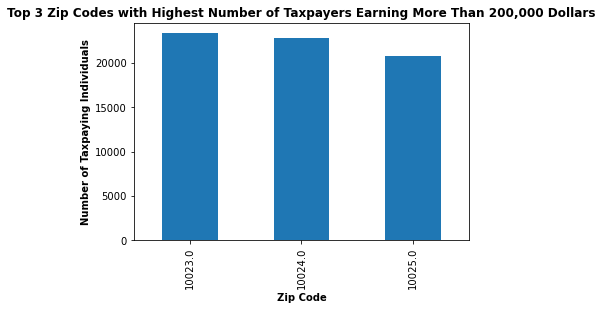

In [50]:
# Plot bar chart of top 10 zip codes with most taxpayers that earn between '200,000.00+'. # pd.dataframe.plot.bar(x,y)
bracket6_numberofindividuals.head(3).plot.bar(x='Zip_Code', y='Number_of_Individuals')
plt.title('Top 3 Zip Codes with Highest Number of Taxpayers Earning More Than 200,000 Dollars', fontweight='bold')
plt.ylabel('Number of Taxpaying Individuals', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [51]:
# Create dataframe for Zip Codes that are above the FPL (i.e. of taxpayers earning less than $25,000.00).
df6_above_FPL = df6[(df6['Size_of_AGI'] == '25,000.00 - 49,999.99') | (df6['Size_of_AGI'] == '50,000.00 - 74,999.99') | (df6['Size_of_AGI'] == '75,000.00 - 99,999.99') | (df6['Size_of_AGI'] == '100,000.00 - 199,999.99') | (df6['Size_of_AGI'] == '200,000.00+')]

# Show the top 3 Zip Codes above FPL.
df6_above_FPL.groupby(['Zip_Code'])['Number_of_Individuals'].sum().sort_values(ascending=False).head(3)

Zip_Code
10314.0    64570.0
11385.0    62470.0
11234.0    61650.0
Name: Number_of_Individuals, dtype: float64

Text(0.5, 0, 'Zip Code')

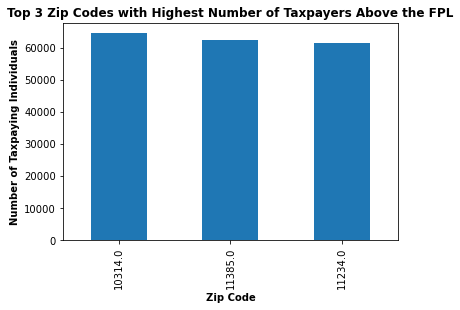

In [52]:
# Plot chart for Top 3 Zip Codes with most taxpayers above FPL, which is $ 25,000+.
df6_above_FPL.groupby(['Zip_Code'])['Number_of_Individuals'].sum().sort_values(ascending=False).head(3).plot.bar(x='Zip_Code', y='Number_of_Individuals')
plt.title('Top 3 Zip Codes with Highest Number of Taxpayers Above the FPL', fontweight='bold')
plt.ylabel('Number of Taxpaying Individuals', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

# Show Pie Chart for top 3 Zip Codes with Highest Number of Taxpayers Above the FPL.

In [53]:
df5[df5['Zip_Code'] == 10314.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
457,10314.0,"1.00 - 24,999.99",16160.0,4410.0,148845.0
458,10314.0,"25,000.00 - 49,999.99",15750.0,5160.0,311689.0
459,10314.0,"50,000.00 - 74,999.99",11280.0,3280.0,380876.0
460,10314.0,"75,000.00 - 99,999.99",9420.0,2880.0,405324.0
461,10314.0,"100,000.00 - 199,999.99",21450.0,7410.0,1151196.0
462,10314.0,"200,000.00+",6670.0,2450.0,713885.0


In [54]:
df5[df5['Zip_Code'] == 11385.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
2289,11385.0,"1.00 - 24,999.99",25040.0,6740.0,232340.0
2290,11385.0,"25,000.00 - 49,999.99",23560.0,7320.0,500638.0
2291,11385.0,"50,000.00 - 74,999.99",15040.0,4530.0,513522.0
2292,11385.0,"75,000.00 - 99,999.99",8860.0,2730.0,371619.0
2293,11385.0,"100,000.00 - 199,999.99",12860.0,4300.0,691907.0
2294,11385.0,"200,000.00+",2150.0,680.0,240263.0


In [55]:
df5[df5['Zip_Code'] == 11234.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
2057,11234.0,"1.00 - 24,999.99",17320.0,4870.0,162951.0
2058,11234.0,"25,000.00 - 49,999.99",18040.0,6200.0,376587.0
2059,11234.0,"50,000.00 - 74,999.99",12030.0,3900.0,417411.0
2060,11234.0,"75,000.00 - 99,999.99",8610.0,2880.0,382062.0
2061,11234.0,"100,000.00 - 199,999.99",16930.0,6280.0,935294.0
2062,11234.0,"200,000.00+",6040.0,2450.0,776950.0


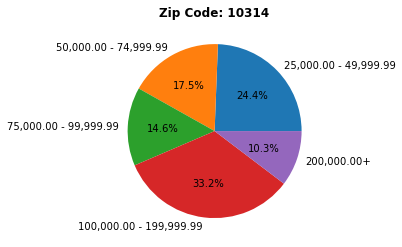

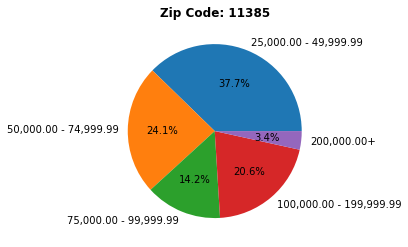

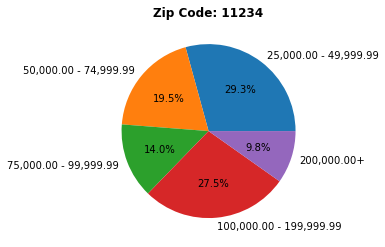

In [56]:
# Pie Chart of top 3 Zip Codes with Highest Number of Taxpayers above the FPL divided by income bracket.

# Corresponding Pie labels for each pie chart.
pie_aboveFPL_label = ["25,000.00 - 49,999.99", "50,000.00 - 74,999.99", "75,000.00 - 99,999.99", "100,000.00 - 199,999.99", "200,000.00+"]

# Number of Individuals (Taxpayers) for Zip Code: 10314 with corresponding labels.
num_taxpayers_aboveFPL_place1 = np.array([15750.0, 11280.0, 9420.0, 21450.0, 6670.0])

# Number of Individuals (Taxpayers) for Zip Code: 11385 with corresponding labels.
num_taxpayers_aboveFPL_place2 = np.array([23560.0, 15040.0, 8860.0, 12860.0, 2150.0])

# Number of Individuals (Taxpayers) for Zip Code: 11373 with corresponding labels.
num_taxpayers_aboveFPL_place3 = np.array([18040.0, 12030.0, 8610.0, 16930.0, 6040.0])

# Plot pie charts
plt.title('Zip Code: 10314', fontweight = 'bold')
plt.pie(num_taxpayers_aboveFPL_place1, labels = pie_aboveFPL_label, autopct='%.1f%%')
plt.show()

plt.title('Zip Code: 11385', fontweight = 'bold')
plt.pie(num_taxpayers_aboveFPL_place2, labels = pie_aboveFPL_label, autopct='%.1f%%')
plt.show()

plt.title('Zip Code: 11234', fontweight = 'bold')
plt.pie(num_taxpayers_aboveFPL_place3, labels = pie_aboveFPL_label, autopct='%.1f%%')
plt.show()

# Top 3 Zip Codes with highest populations.

In [57]:
# Note: Ex.sum_column = df["col1"] + df["col2"] # 'Number_of_Individuals' and 'Number_of_dependents'.
# Note: Ex. df['col3'] = sum_column # Presents combined.

# Note: This did not work. # Create population size per Zip Code.
# Note: top10_populations = df6['Number_of_Individuals'] + df6['Number_of_dependents']
# Note: This did not work. # Limit to show only 10 rows and show only highest population size.
# Note: top10_populations.head(10).sort_values(ascending=False)

# Note: Ex. Concatenated dataframes of top 10 average AGI and top 10 average income.
# Note: Ex. top10_agi = df5.groupby(['Zip_Code'])['Average_Adjusted_Gross_Income'].sum().sort_values(ascending=False).head(10)
# Note: Ex. top10_income = df5.groupby(['Zip_Code'])['Average_Income_Amount'].sum().sort_values(ascending=False).head(10)
# Note: Ex. bothtop10_agi_and_income = [top10_agi, top10_income]
# Note: Ex. pd.concat(bothtop10_agi_and_income, axis=1)
# Note: num_of_inds.merge(num_of_deps, how='left', on='Zip_Code').head(10) # This does not work.

# Note: Previously used when final command in this cell was not working: # print(population_size.sort_values(ascending=False).head(10))

# Top 3 Zip Codes with highest populations (i.e. combine tax paying individuals and dependents).
# Create population size per Zip Code.
num_of_inds = df5.groupby(['Zip_Code'])['Number_of_Individuals'].sum()
num_of_deps = df5.groupby(['Zip_Code'])['Number_of_dependents'].sum()  
population_size = num_of_inds + num_of_deps

# Limit to show 3 Zip Codes with highest population size per Zip Code. Note: Values were checked manually in Excel table to verify correct values for population_size.
population_size.sort_values(ascending=False).head(3)

Zip_Code
11220.0    141050.0
11368.0    134410.0
11219.0    133840.0
dtype: float64

Text(0.5, 0, 'Zip Code')

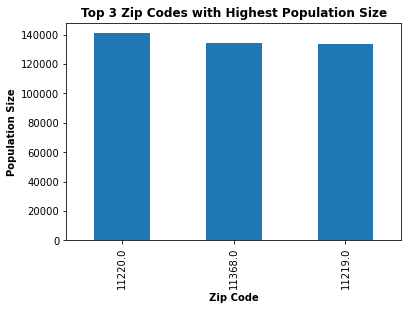

In [58]:
# Plot chart for Top 3 Zip Codes with highest population size (i.e. total sum of individual taxpayers and their dependents).
population_size.sort_values(ascending=False).head(3).plot.bar(x='Zip_Code', y='Number_of_Individuals')
plt.title('Top 3 Zip Codes with Highest Population Size', fontweight='bold')
plt.ylabel('Population Size', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

# Pie Chart for Top 3 Zip Codes with the Highest Population Size.

In [59]:
df5[df5['Zip_Code'] == 11220.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
1953,11220.0,"1.00 - 24,999.99",59290.0,17450.0,445650.0
1954,11220.0,"25,000.00 - 49,999.99",28660.0,11370.0,420544.0
1955,11220.0,"50,000.00 - 74,999.99",8190.0,2690.0,260501.0
1956,11220.0,"75,000.00 - 99,999.99",3830.0,1150.0,166023.0
1957,11220.0,"100,000.00 - 199,999.99",4950.0,1590.0,285314.0
1958,11220.0,"200,000.00+",1390.0,490.0,188072.0


In [60]:
df5[df5['Zip_Code'] == 11368.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
2209,11368.0,"1.00 - 24,999.99",42560.0,15090.0,319769.0
2210,11368.0,"25,000.00 - 49,999.99",31680.0,13450.0,502758.0
2211,11368.0,"50,000.00 - 74,999.99",13080.0,5280.0,354828.0
2212,11368.0,"75,000.00 - 99,999.99",5450.0,2100.0,200072.0
2213,11368.0,"100,000.00 - 199,999.99",3920.0,1410.0,205870.0
2214,11368.0,"200,000.00+",290.0,100.0,41854.0


In [61]:
df5[df5['Zip_Code'] == 11219.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
1945,11219.0,"1.00 - 24,999.99",41840.0,16770.0,255956.0
1946,11219.0,"25,000.00 - 49,999.99",27850.0,14470.0,292742.0
1947,11219.0,"50,000.00 - 74,999.99",8010.0,3670.0,180646.0
1948,11219.0,"75,000.00 - 99,999.99",4600.0,2160.0,134970.0
1949,11219.0,"100,000.00 - 199,999.99",6480.0,3210.0,259541.0
1950,11219.0,"200,000.00+",3130.0,1650.0,531857.0


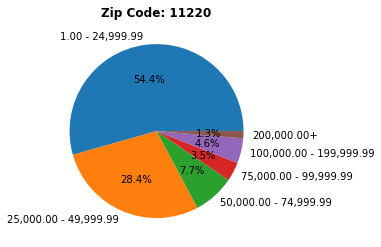

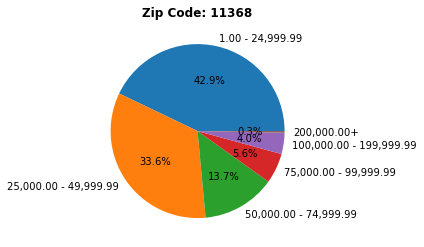

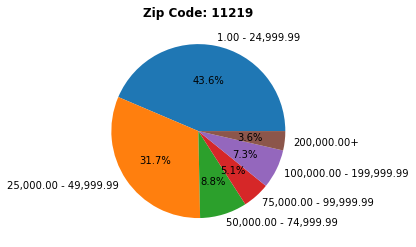

In [62]:
# Pie Chart of top 3 Zip Codes with Highest Population Size divided by income bracket.

# Corresponding Pie labels for each pie chart.
pie_popsize_label = ["1.00 - 24,999.99", "25,000.00 - 49,999.99", "50,000.00 - 74,999.99", "75,000.00 - 99,999.99", "100,000.00 - 199,999.99", "200,000.00+"]

# Each income brackets Population Size for Zip Code: 11220 with corresponding labels.
num_taxpayers_popsize_place1 = np.array([76740.0, 40030.0, 10880.0, 4980.0, 6540.0, 1880.0])

# Each income brackets Population Size for Zip Code: 11368 with corresponding labels.
num_taxpayers_popsize_place2 = np.array([57650.0, 45130.0, 18360.0, 7550.0, 5330.0, 390.0])

# Each income brackets Population Size for Zip Code: 11219 with corresponding labels.
num_taxpayers_popsize_place3 = np.array([58160.0, 42320.0, 11680.0, 6760.0, 9690.0, 4780.0])

# Plot pie charts
plt.title('Zip Code: 11220', fontweight = 'bold')
plt.pie(num_taxpayers_popsize_place1, labels = pie_popsize_label, autopct='%.1f%%')
plt.show()

plt.title('Zip Code: 11368', fontweight = 'bold')
plt.pie(num_taxpayers_popsize_place2, labels = pie_popsize_label, autopct='%.1f%%')
plt.show()

plt.title('Zip Code: 11219', fontweight = 'bold')
plt.pie(num_taxpayers_popsize_place3, labels = pie_popsize_label, autopct='%.1f%%')
plt.show()

In [63]:
# Top 3 Zip Codes with highest populations for '1.00 - 24,999.99' size of AGI bracket.
bracket1_num_of_inds = df6[df6['Size_of_AGI'] == '1.00 - 24,999.99']['Number_of_Individuals'].sort_values(ascending=False)
bracket1_num_of_deps = df6[df6['Size_of_AGI'] == '1.00 - 24,999.99']['Number_of_dependents'].sort_values(ascending=False)
bracket1_population_size = bracket1_num_of_inds + bracket1_num_of_deps

# Limit to show 3 Zip Codes with highest population size per Zip Code. Note: Values were checked manually in Excel table to verify correct values for population_size.
bracket1_population_size.sort_values(ascending=False).head(3)

Zip_Code
11220.0    76740.0
11355.0    60240.0
11219.0    58610.0
dtype: float64

Text(0.5, 0, 'Zip Code')

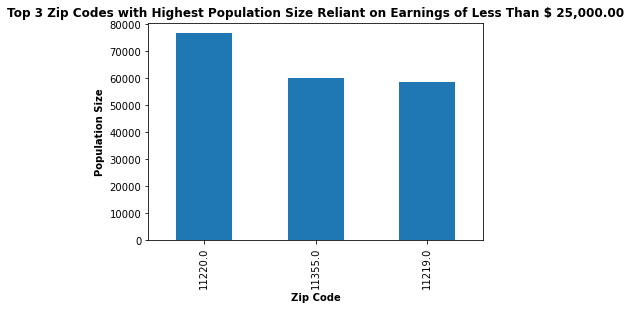

In [64]:
# Plot bar chart for top 3 Zip Codes with highest populations for '1.00 - 24,999.99' size of AGI bracket.
bracket1_population_size.sort_values(ascending=False).head(3).plot.bar(x='Zip_Code', y='Population Size')
plt.title('Top 3 Zip Codes with Highest Population Size Reliant on Earnings of Less Than $ 25,000.00', fontweight='bold')
plt.ylabel('Population Size', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [65]:
# Top 3 Zip Codes with highest populations for '25,000.00 - 49,999.99' size of AGI bracket.
bracket2_num_of_inds = df6[df6['Size_of_AGI'] == '25,000.00 - 49,999.99']['Number_of_Individuals'].sort_values(ascending=False)
bracket2_num_of_deps = df6[df6['Size_of_AGI'] == '25,000.00 - 49,999.99']['Number_of_dependents'].sort_values(ascending=False)
bracket2_population_size = bracket2_num_of_inds + bracket2_num_of_deps

# Limit to show 3 Zip Codes with highest population size per Zip Code. Note: Values were checked manually in Excel table to verify correct values for population_size.
bracket2_population_size.sort_values(ascending=False).head(3)

Zip_Code
11368.0    45130.0
11219.0    42320.0
11220.0    40030.0
dtype: float64

Text(0.5, 0, 'Zip Code')

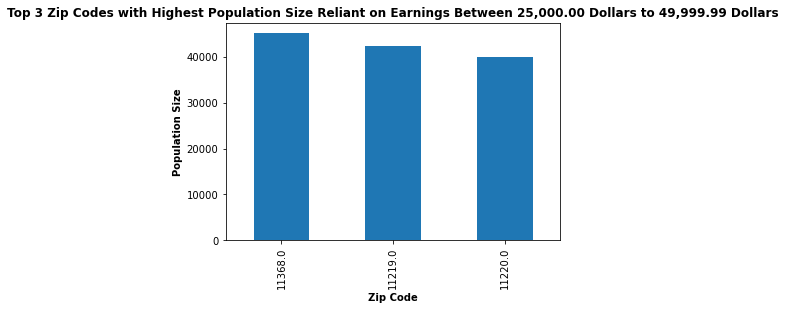

In [66]:
# Plot bar chart for top 3 Zip Codes with highest populations for '25,000.00 - 49,999.99' size of AGI bracket.
bracket2_population_size.sort_values(ascending=False).head(3).plot.bar(x='Zip_Code', y='Population Size')
plt.title('Top 3 Zip Codes with Highest Population Size Reliant on Earnings Between 25,000.00 Dollars to 49,999.99 Dollars', fontweight='bold')
plt.ylabel('Population Size', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [67]:
# Top 10 Zip Codes with highest populations for '50,000.00 - 74,999.99' size of AGI bracket.
bracket3_num_of_inds = df6[df6['Size_of_AGI'] == '50,000.00 - 74,999.99']['Number_of_Individuals'].sort_values(ascending=False)
bracket3_num_of_deps = df6[df6['Size_of_AGI'] == '50,000.00 - 74,999.99']['Number_of_dependents'].sort_values(ascending=False)
bracket3_population_size = bracket3_num_of_inds + bracket3_num_of_deps

# Limit to show 3 Zip Codes with highest population size per Zip Code. Note: Values were checked manually in Excel table to verify correct values for population_size.
bracket3_population_size.sort_values(ascending=False).head(3)

Zip_Code
11236.0    19800.0
11385.0    19570.0
11226.0    18640.0
dtype: float64

Text(0.5, 0, 'Zip Code')

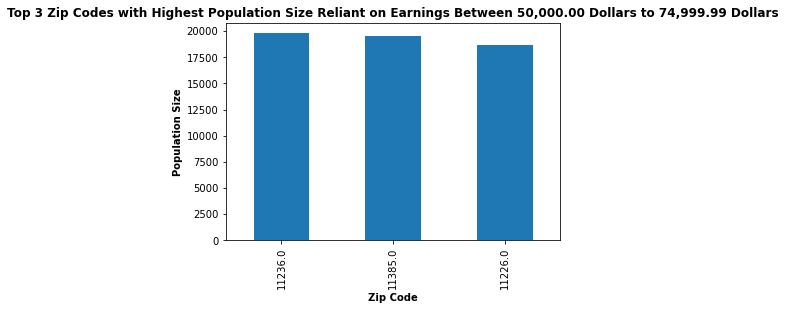

In [68]:
# Plot bar chart for top 3 Zip Codes with highest populations for '50,000.00 - 74,999.99' size of AGI bracket.
bracket3_population_size.sort_values(ascending=False).head(3).plot.bar(x='Zip_Code', y='Population Size')
plt.title('Top 3 Zip Codes with Highest Population Size Reliant on Earnings Between 50,000.00 Dollars to 74,999.99 Dollars', fontweight='bold')
plt.ylabel('Population Size', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [69]:
# Top 3 Zip Codes with highest populations for '75,000.00 - 99,999.99' size of AGI bracket.
bracket4_num_of_inds = df6[df6['Size_of_AGI'] == '75,000.00 - 99,999.99']['Number_of_Individuals'].sort_values(ascending=False)
bracket4_num_of_deps = df6[df6['Size_of_AGI'] == '75,000.00 - 99,999.99']['Number_of_dependents'].sort_values(ascending=False)
bracket4_population_size = bracket4_num_of_inds + bracket4_num_of_deps

# Limit to show 3 Zip Codes with highest population size per Zip Code. Note: Values were checked manually in Excel table to verify correct values for population_size.
bracket4_population_size.sort_values(ascending=False).head(3)

Zip_Code
10314.0    12300.0
11385.0    11590.0
11234.0    11490.0
dtype: float64

Text(0.5, 0, 'Zip Code')

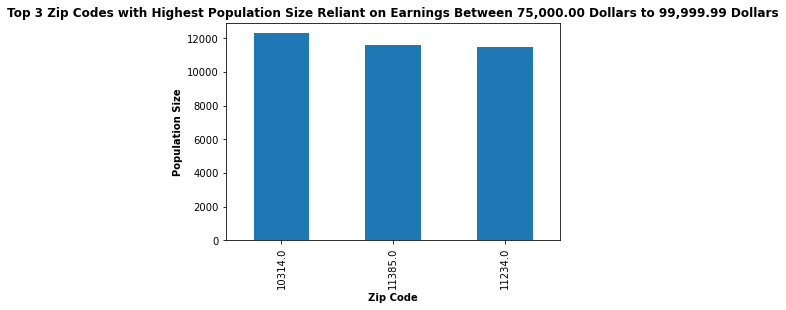

In [70]:
# Plot bar chart for top 3 Zip Codes with highest populations for '75,000.00 - 99,999.99' size of AGI bracket.
bracket4_population_size.sort_values(ascending=False).head(3).plot.bar(x='Zip_Code', y='Population Size')
plt.title('Top 3 Zip Codes with Highest Population Size Reliant on Earnings Between 75,000.00 Dollars to 99,999.99 Dollars', fontweight='bold')
plt.ylabel('Population Size', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [71]:
# Top 3 Zip Codes with highest populations for '100,000.00 - 199,999.99' size of AGI bracket.
bracket5_num_of_inds = df6[df6['Size_of_AGI'] == '100,000.00 - 199,999.99']['Number_of_Individuals'].sort_values(ascending=False)
bracket5_num_of_deps = df6[df6['Size_of_AGI'] == '100,000.00 - 199,999.99']['Number_of_dependents'].sort_values(ascending=False)
bracket5_population_size = bracket5_num_of_inds + bracket5_num_of_deps

# Limit to show 3 Zip Codes with highest population size per Zip Code. Note: Values were checked manually in Excel table to verify correct values for population_size.
bracket5_population_size.sort_values(ascending=False).head(3)

Zip_Code
10314.0    28860.0
10312.0    25500.0
11234.0    23210.0
dtype: float64

Text(0.5, 0, 'Zip Code')

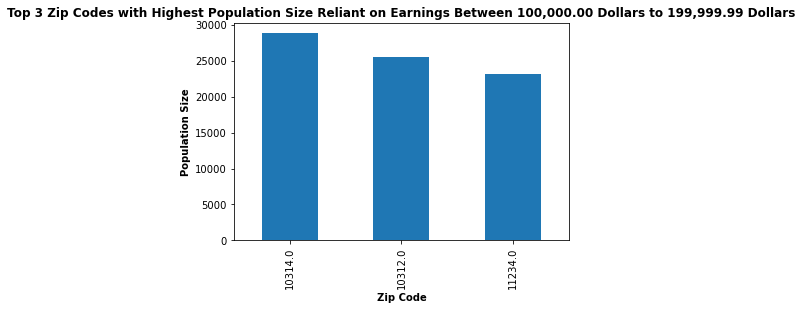

In [72]:
# Plot bar chart for top 3 Zip Codes with highest populations for '100,000.00 - 199,999.99' size of AGI bracket.
bracket5_population_size.sort_values(ascending=False).head(3).plot.bar(x='Zip_Code', y='Population Size')
plt.title('Top 3 Zip Codes with Highest Population Size Reliant on Earnings Between 100,000.00 Dollars to 199,999.99 Dollars', fontweight='bold')
plt.ylabel('Population Size', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [73]:
# Top 3 Zip Codes with highest populations for '200,000.00+' size of AGI bracket.
bracket6_num_of_inds = df6[df6['Size_of_AGI'] == '200,000.00+']['Number_of_Individuals'].sort_values(ascending=False)
bracket6_num_of_deps = df6[df6['Size_of_AGI'] == '200,000.00+']['Number_of_dependents'].sort_values(ascending=False)
bracket6_population_size = bracket6_num_of_inds + bracket6_num_of_deps

# Limit to show 3 Zip Codes with highest population size per Zip Code. Note: Values were checked manually in Excel table to verify correct values for population_size.
bracket6_population_size.sort_values(ascending=False).head(3)

Zip_Code
10024.0    30200.0
10023.0    29670.0
10128.0    27250.0
dtype: float64

Text(0.5, 0, 'Zip Code')

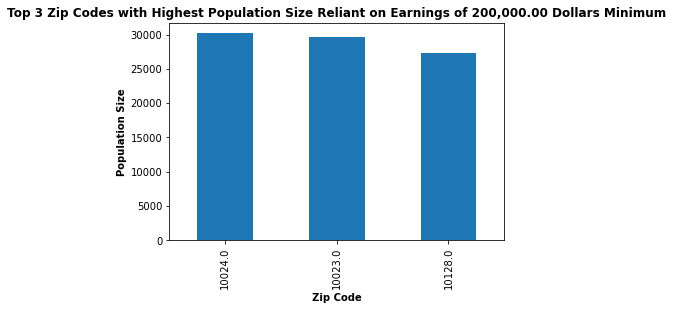

In [74]:
# Plot bar chart for top 3 Zip Codes with highest populations for '200,000.00+' size of AGI bracket.
bracket6_population_size.sort_values(ascending=False).head(3).plot.bar(x='Zip_Code', y='Population Size')
plt.title('Top 3 Zip Codes with Highest Population Size Reliant on Earnings of 200,000.00 Dollars Minimum', fontweight='bold')
plt.ylabel('Population Size', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

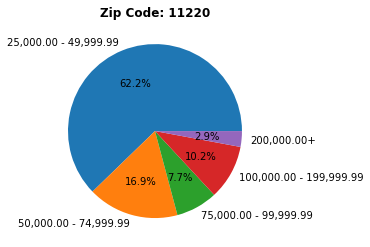

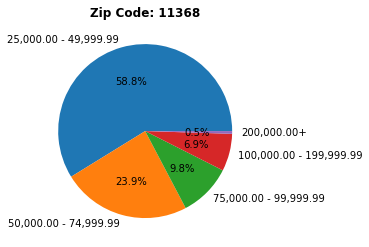

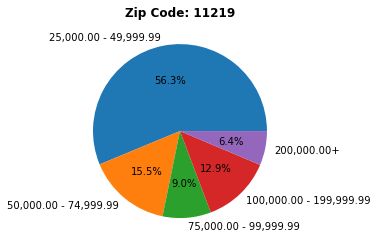

In [75]:
# Pie Chart of top 3 Zip Codes with Highest Population Size for taxpayers above FPL divided by income bracket.

# Corresponding Pie labels for each pie chart.
pie_popsize_label_aboveFPL = ["25,000.00 - 49,999.99", "50,000.00 - 74,999.99", "75,000.00 - 99,999.99", "100,000.00 - 199,999.99", "200,000.00+"]

# Each income brackets Population Size for Zip Code: 11220 with corresponding labels.
num_taxpayers_popsize_place1_aboveFPL = np.array([40030.0, 10880.0, 4980.0, 6540.0, 1880.0])

# Each income brackets Population Size for Zip Code: 11368 with corresponding labels.
num_taxpayers_popsize_place2_aboveFPL = np.array([45130.0, 18360.0, 7550.0, 5330.0, 390.0])

# Each income brackets Population Size for Zip Code: 11219 with corresponding labels.
num_taxpayers_popsize_place3_aboveFPL = np.array([42320.0, 11680.0, 6760.0, 9690.0, 4780.0])

# Plot pie charts
plt.title('Zip Code: 11220', fontweight = 'bold')
plt.pie(num_taxpayers_popsize_place1_aboveFPL, labels = pie_popsize_label_aboveFPL, autopct='%.1f%%')
plt.show()

plt.title('Zip Code: 11368', fontweight = 'bold')
plt.pie(num_taxpayers_popsize_place2_aboveFPL, labels = pie_popsize_label_aboveFPL, autopct='%.1f%%')
plt.show()

plt.title('Zip Code: 11219', fontweight = 'bold')
plt.pie(num_taxpayers_popsize_place3_aboveFPL, labels = pie_popsize_label_aboveFPL, autopct='%.1f%%')
plt.show()

# Top 3 Zip Codes with the highest Average Income.

In [76]:
# Note: Tabulate useful data with groupby 'Zip Code' and 'Size of adjusted gross income' to find total sum of 'AGI' 'Average Income Amount'.
# Note: Use ascending attribute to find top 10 'AGI' and 'Average Income Amount' per Zip Code.
# Note: Each item checked individually to make sure they are ordered correctly.

# Dataframes of top 3 average Income overall.
top3_income = df5.groupby(['Zip_Code'])['Average_Income'].sum().sort_values(ascending=False).head(3)

# UPDATE: Removed the dataframe of Average AGI because it is redundant to have 2 placeholders of disposable income.
# Note: top10_agi = df5.groupby(['Zip_Code'])['Average_AGI'].sum().sort_values(ascending=False).head(10)
# Note: bothtop10_agi_and_income = [top10_agi, top10_income]
# Note: pd.concat(bothtop10_agi_and_income, axis=1) 

Text(0.5, 0, 'Zip Code')

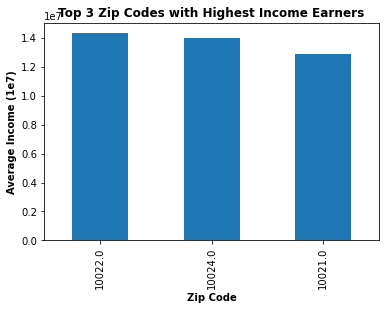

In [77]:
# Plot bar chart for top 3 Zip Codes with highest Average Income Overall.
top3_income.plot.bar(x='Zip_Code', y='Average_Income')
plt.title('Top 3 Zip Codes with Highest Income Earners', fontweight='bold')
plt.ylabel('Average Income (1e7)', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [78]:
df5[df5['Zip_Code'] == 10022.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
153,10022.0,"1.00 - 24,999.99",2340.0,200.0,29377.0
154,10022.0,"25,000.00 - 49,999.99",2230.0,190.0,78519.0
155,10022.0,"50,000.00 - 74,999.99",2710.0,220.0,148807.0
156,10022.0,"75,000.00 - 99,999.99",2490.0,230.0,182015.0
157,10022.0,"100,000.00 - 199,999.99",6510.0,730.0,684598.0
158,10022.0,"200,000.00+",13270.0,3070.0,13216385.0


In [79]:
df5[df5['Zip_Code'] == 10024.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
169,10024.0,"1.00 - 24,999.99",4760.0,640.0,59048.0
170,10024.0,"25,000.00 - 49,999.99",4170.0,620.0,130116.0
171,10024.0,"50,000.00 - 74,999.99",4190.0,510.0,214525.0
172,10024.0,"75,000.00 - 99,999.99",3730.0,480.0,253324.0
173,10024.0,"100,000.00 - 199,999.99",9540.0,1430.0,909397.0
174,10024.0,"200,000.00+",22860.0,7340.0,12424851.0


In [80]:
df5[df5['Zip_Code'] == 10021.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
145,10021.0,"1.00 - 24,999.99",2550.0,190.0,35269.0
146,10021.0,"25,000.00 - 49,999.99",2510.0,180.0,89231.0
147,10021.0,"50,000.00 - 74,999.99",3230.0,220.0,182501.0
148,10021.0,"75,000.00 - 99,999.99",2970.0,230.0,223317.0
149,10021.0,"100,000.00 - 199,999.99",7140.0,870.0,731899.0
150,10021.0,"200,000.00+",16630.0,4740.0,11671570.0


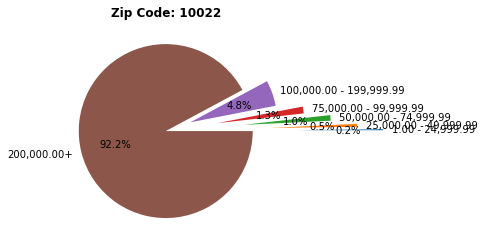

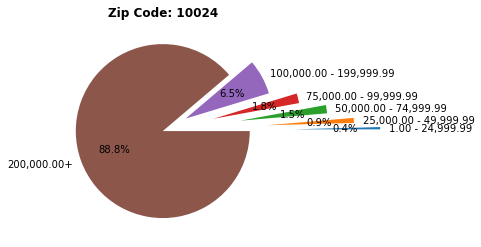

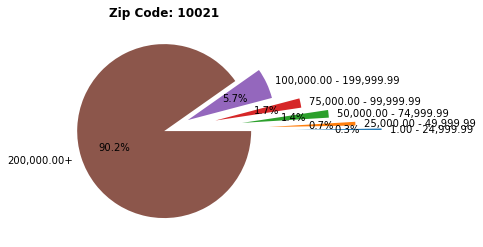

In [81]:
# Pie Chart for Highest Average Income Earners divided by income bracket.

# Corresponding Pie labels for each pie chart.
pie_popsize_label = ["1.00 - 24,999.99", "25,000.00 - 49,999.99", "50,000.00 - 74,999.99", "75,000.00 - 99,999.99", "100,000.00 - 199,999.99", "200,000.00+"]

# Zip Code with the highest income brackets for Highest Avg Income Earners: 10022 with corresponding labels.
num_taxpayers_hi_income_place1 = np.array([29377.0, 78519.0, 148807.0, 182015.0, 684598.0, 13216385.0])

# Zip Code with the highest income brackets for Highest Avg Income Earners: 10024 with corresponding labels.
num_taxpayers_hi_income_place2 = np.array([59048.0, 130116.0, 214525.0, 253324.0, 909397.0, 12424851.0])

# Zip Code with the highest income brackets for Highest Avg Income Earners: 10021 with corresponding labels.
num_taxpayers_hi_income_place3 = np.array([35269.0, 89231.0, 182501.0, 223317.0, 731899.0, 11671570.0])

# Make Smaller sections spread out and are now legible.
explode = (1.5, 1.2, 0.9, 0.6, 0.3, 0)

# Plot pie charts
plt.title('Zip Code: 10022', fontweight = 'bold')
plt.pie(num_taxpayers_hi_income_place1, explode=explode, labels = pie_popsize_label, autopct='%.1f%%')
plt.show()

plt.title('Zip Code: 10024', fontweight = 'bold')
plt.pie(num_taxpayers_hi_income_place2, explode=explode, labels = pie_popsize_label, autopct='%.1f%%')
plt.show()

plt.title('Zip Code: 10021', fontweight = 'bold')
plt.pie(num_taxpayers_hi_income_place3, explode=explode, labels = pie_popsize_label, autopct='%.1f%%')
plt.show()

In [82]:
# Update: No longer used.
# Plot bar chart for top 10 Zip Codes with highest Average Income Overall.
# top10_income.plot.bar(x='Zip_Code', y='Average_Income_Amount', color=['violet'])
# plt.title('Top 10 Zip Codes with Highest Average Income', fontweight='bold')
# plt.ylabel('Average Income (1e^7)', fontweight='bold')
# plt.xlabel('Zip Code', fontweight='bold')

# Top 3 Zip Codes with the highest Average Income for each AGI bracket.

In [83]:
# Top 3 Zip Codes for Avg Income for bracket('1.00 - 24,999.99').
# Explanation: Originally we showed top 10, but for accuracies sake, in which the results of top 3 Zip Codes with highest Avg AGI and Income remained the same, we limited it to top 3.
bracket1_top3avg_income = df6[df6['Size_of_AGI'] == '1.00 - 24,999.99']['Average_Income'].sort_values(ascending=False).head(3)

# No longer used: bracket1_top10avg_agi = df6[df6['Size_of_adjusted_gross_income'] == '1.00 - 24,999.99']['Average_AGI'].sort_values(ascending=False).head(10)
# No longer used: bothbracket1 = [bracket1_top10avg_AGI, bracket1_top10avg_income]
# No longer used: pd.concat(bothbracket1, axis=1)

Text(0.5, 0, 'Zip Code')

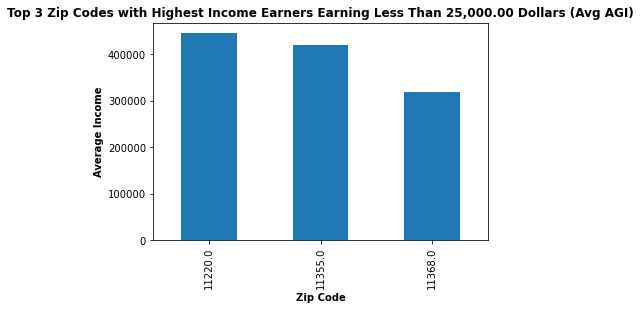

In [84]:
# Plot bar chart for top 3 Zip Codes with highest income for the ('1.00 - 24,999.99') AGI bracket.
bracket1_top3avg_income.plot.bar(x='Zip_Code', y='Average_Income')
plt.title('Top 3 Zip Codes with Highest Income Earners Earning Less Than 25,000.00 Dollars (Avg AGI)', fontweight='bold')
plt.ylabel('Average Income', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [85]:
# Top 3 Zip Codes with highest income for ('25,000.00 - 49,999.99') AGI bracket.
bracket2_top3avg_income = df6[df6['Size_of_AGI'] == '25,000.00 - 49,999.99']['Average_Income'].sort_values(ascending=False).head(3)

# No longer used: bracket2_top10avg_agi = df6[df6['Size_of_adjusted_gross_income'] == '25,000.00 - 49,999.99']['Average_AGI'].sort_values(ascending=False).head(10)
# No longer used: bothbracket2 = [bracket2_top10avg_AGI, bracket2_top10avg_income]
# No longer used: pd.concat(bothbracket2, axis=1)

Text(0.5, 0, 'Zip Code')

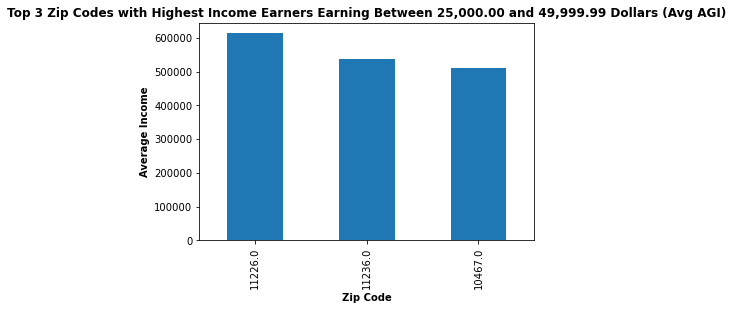

In [86]:
bracket2_top3avg_income.plot.bar(x='Zip_Code', y='Average_Income')
plt.title('Top 3 Zip Codes with Highest Income Earners Earning Between 25,000.00 and 49,999.99 Dollars (Avg AGI)', fontweight='bold')
plt.ylabel('Average Income', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [87]:
# Note: Top 10 Zip Codes for Avg AGI and Avg Income for bracket('50,000.00 - 74,999.99').
# Note: bracket3_top10avg_AGI = df6[df6['Size_of_adjusted_gross_income'] == '50,000.00 - 74,999.99']['Average_Adjusted_Gross_Income'].sort_values(ascending=False).head(10)
# Note: bracket3_top10avg_income = df6[df6['Size_of_adjusted_gross_income'] == '50,000.00 - 74,999.99']['Average_Income_Amount'].sort_values(ascending=False).head(10)
# Note: bothbracket3 = [bracket3_top10avg_AGI, bracket3_top10avg_income]
# Note: pd.concat(bothbracket3, axis=1)
# This won't work because Top 7 to 10 is varies comparing between the two for the same '50,000.00 - 74,999.99' bracket.

In [88]:
# Top 3 Zip Codes for Avg AGI for bracket('50,000.00 - 74,999.99').
# Note: Top 7 to 10 varies between avg income and total income for this bracket.
bracket3_top3avg_income = df6[df6['Size_of_AGI'] == '50,000.00 - 74,999.99']['Average_Income'].sort_values(ascending=False).head(3)

Text(0.5, 0, 'Zip Code')

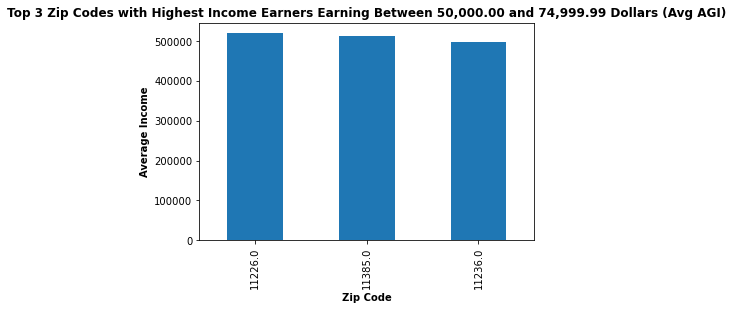

In [89]:
bracket3_top3avg_income.plot.bar(x='Zip_Code', y='Average_Income')
plt.title('Top 3 Zip Codes with Highest Income Earners Earning Between 50,000.00 and 74,999.99 Dollars (Avg AGI)', fontweight='bold')
plt.ylabel('Average Income', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [90]:
# Top 10 Zip Codes for Avg Income for bracket('50,000.00 - 74,999.99').
# Note: Top 7 to 10 varies between avg income and total income for this bracket.
# No longer used: df6[df6['Size_of_AGI'] == '50,000.00 - 74,999.99']['Average_Income'].sort_values(ascending=False).head(10)

In [91]:
# Top 3 Zip Codes for Avg Income for bracket('75,000.00 - 99,999.99').
# Note: Top 4 to 10 varies between avg income and total income for this bracket.
bracket4_top3avg_income = df6[df6['Size_of_AGI'] == '75,000.00 - 99,999.99']['Average_Income'].sort_values(ascending=False).head(3)

Text(0.5, 0, 'Zip Code')

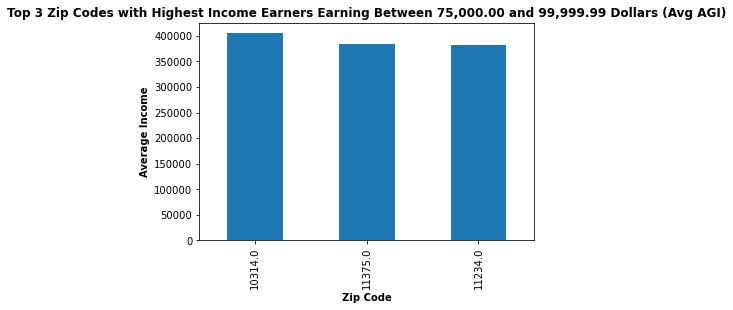

In [92]:
bracket4_top3avg_income.plot.bar(x='Zip_Code', y='Average_Income')
plt.title('Top 3 Zip Codes with Highest Income Earners Earning Between 75,000.00 and 99,999.99 Dollars (Avg AGI)', fontweight='bold')
plt.ylabel('Average Income', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [93]:
# Top 10 Zip Codes for Total Income Amount for bracket('75,000.00 - 99,999.99').
# Note: Top 4 to 10 varies between avg income and total income for this bracket.
# No longer used: df6[df6['Size_of_adjusted_gross_income'] == '75,000.00 - 99,999.99']['Average_Income_Amount'].sort_values(ascending=False).head(10)

In [94]:
# Top 3 Zip Codes for Avg Income for bracket('100,000.00 - 199,999.99').
# Note: Top 4 to 10 varies between avg income and total income for this bracket.
bracket5_top3avg_income = df6[df6['Size_of_AGI'] == '100,000.00 - 199,999.99']['Average_Income'].sort_values(ascending=False).head(3)

Text(0.5, 0, 'Zip Code')

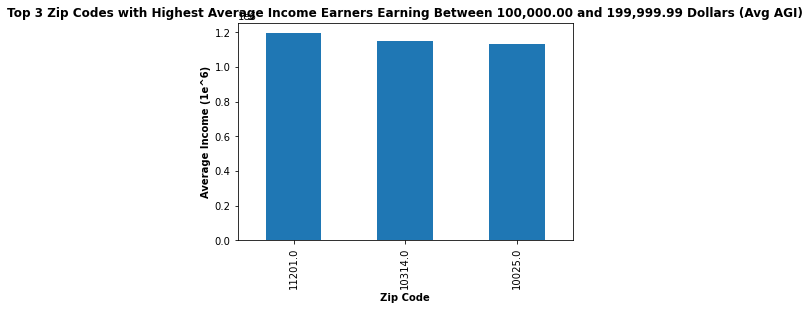

In [95]:
bracket5_top3avg_income.plot.bar(x='Zip_Code', y='Average_Income')
plt.title('Top 3 Zip Codes with Highest Average Income Earners Earning Between 100,000.00 and 199,999.99 Dollars (Avg AGI)', fontweight='bold')
plt.ylabel('Average Income (1e^6)', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [96]:
# Top 10 Zip Codes for Total Income Amount for bracket('100,000.00 - 199,999.99').
# Note: Top 4 to 10 varies between avg income and total income for this bracket.
# No longer used: df6[df6['Size_of_AGI'] == '100,000.00 - 199,999.99']['Average_Income_Amount'].sort_values(ascending=False).head(10)

In [97]:
# Top 3 Zip Codes for Avg Income and Total Income for bracket('200,000.00+').
bracket6_top3avg_income = df6[df6['Size_of_AGI'] == '200,000.00+']['Average_Income'].sort_values(ascending=False).head(3)

# No longer used: bracket6_top10avg_income = df6[df6['Size_of_adjusted_gross_income'] == '200,000.00+']['Average_Income_Amount'].sort_values(ascending=False).head(3)
# No longer used: bothbracket6 = [bracket6_top10avg_AGI, bracket6_top10avg_income]
# No longer used: pd.concat(bothbracket6, axis=1)

Text(0.5, 0, 'Zip Code')

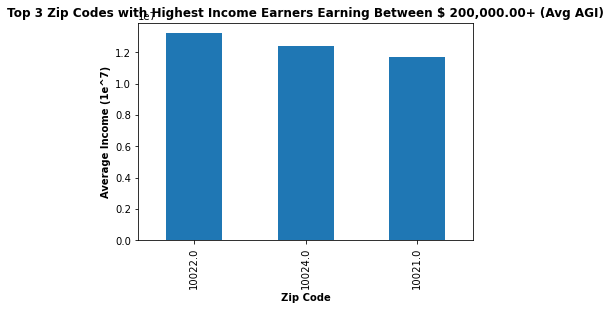

In [98]:
bracket6_top3avg_income.plot.bar(x='Zip_Code', y='Average_Income')
plt.title('Top 3 Zip Codes with Highest Income Earners Earning Between $ 200,000.00+ (Avg AGI)', fontweight='bold')
plt.ylabel('Average Income (1e^7)', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

# Show Pie Chart for Highest Income Earners above FPL.

In [99]:
# Create dataframe for Zip Codes that are above the FPL (i.e. of taxpayers earning less than $25,000.00).
df6_above_FPL = df6[(df6['Size_of_AGI'] == '25,000.00 - 49,999.99') | (df6['Size_of_AGI'] == '50,000.00 - 74,999.99') | (df6['Size_of_AGI'] == '75,000.00 - 99,999.99') | (df6['Size_of_AGI'] == '100,000.00 - 199,999.99') | (df6['Size_of_AGI'] == '200,000.00+')]

# Show the top 3 Zip Codes with Highest Income Earners above FPL.
df6_above_FPL.groupby(['Zip_Code'])['Average_Income'].sum().sort_values(ascending=False).head(3)

Zip_Code
10022.0    14310324.0
10024.0    13932213.0
10021.0    12898518.0
Name: Average_Income, dtype: float64

Text(0.5, 0, 'Zip Code')

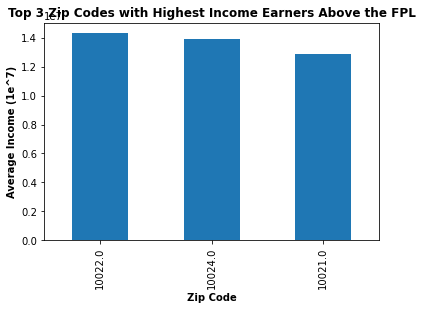

In [100]:
df6_above_FPL.groupby(['Zip_Code'])['Average_Income'].sum().sort_values(ascending=False).head(3).plot.bar(x='Zip_Code', y='Average_Income')
plt.title('Top 3 Zip Codes with Highest Income Earners Above the FPL', fontweight='bold')
plt.ylabel('Average Income (1e^7)', fontweight='bold')
plt.xlabel('Zip Code', fontweight='bold')

In [101]:
df5[df5['Zip_Code'] == 10022.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
153,10022.0,"1.00 - 24,999.99",2340.0,200.0,29377.0
154,10022.0,"25,000.00 - 49,999.99",2230.0,190.0,78519.0
155,10022.0,"50,000.00 - 74,999.99",2710.0,220.0,148807.0
156,10022.0,"75,000.00 - 99,999.99",2490.0,230.0,182015.0
157,10022.0,"100,000.00 - 199,999.99",6510.0,730.0,684598.0
158,10022.0,"200,000.00+",13270.0,3070.0,13216385.0


In [102]:
df5[df5['Zip_Code'] == 10024.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
169,10024.0,"1.00 - 24,999.99",4760.0,640.0,59048.0
170,10024.0,"25,000.00 - 49,999.99",4170.0,620.0,130116.0
171,10024.0,"50,000.00 - 74,999.99",4190.0,510.0,214525.0
172,10024.0,"75,000.00 - 99,999.99",3730.0,480.0,253324.0
173,10024.0,"100,000.00 - 199,999.99",9540.0,1430.0,909397.0
174,10024.0,"200,000.00+",22860.0,7340.0,12424851.0


In [103]:
df5[df5['Zip_Code'] == 10021.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
145,10021.0,"1.00 - 24,999.99",2550.0,190.0,35269.0
146,10021.0,"25,000.00 - 49,999.99",2510.0,180.0,89231.0
147,10021.0,"50,000.00 - 74,999.99",3230.0,220.0,182501.0
148,10021.0,"75,000.00 - 99,999.99",2970.0,230.0,223317.0
149,10021.0,"100,000.00 - 199,999.99",7140.0,870.0,731899.0
150,10021.0,"200,000.00+",16630.0,4740.0,11671570.0


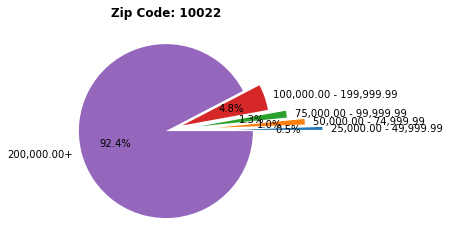

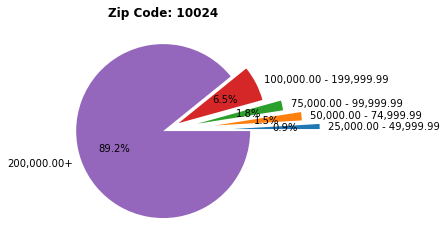

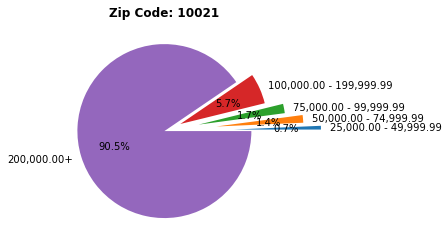

In [104]:
# Pie Charts of Highest Income Earners above FPL. ...
# ... Since, the '1.00 - 24,999.99' bracket is incredibly small for these Zip Codes. ...
# ... There should hardly be a difference to the Overall Highest Income Earner Pie Chart.

# Corresponding Pie labels for each pie chart.
pie_popsize_aboveFPL_label = ["25,000.00 - 49,999.99", "50,000.00 - 74,999.99", "75,000.00 - 99,999.99", "100,000.00 - 199,999.99", "200,000.00+"]

# Zip Code with the highest income brackets for Highest Avg Income Earners: 10022 with corresponding labels.
num_taxpayers_hi_income_aboveFPL_place1 = np.array([78519.0, 148807.0, 182015.0, 684598.0, 13216385.0])

# Zip Code with the highest income brackets for Highest Avg Income Earners: 10024 with corresponding labels.
num_taxpayers_hi_income_aboveFPL_place2 = np.array([130116.0, 214525.0, 253324.0, 909397.0, 12424851.0])

# Zip Code with the highest income brackets for Highest Avg Income Earners: 10021 with corresponding labels.
num_taxpayers_hi_income_aboveFPL_place3 = np.array([89231.0, 182501.0, 223317.0, 731899.0, 11671570.0])

# Make Smaller sections spread out and are now legible.
explode = (0.8, 0.6, 0.4, 0.2, 0)

# Plot pie charts
plt.title('Zip Code: 10022', fontweight = 'bold')
plt.pie(num_taxpayers_hi_income_aboveFPL_place1, explode=explode, labels = pie_popsize_aboveFPL_label, autopct='%.1f%%')
plt.show()

plt.title('Zip Code: 10024', fontweight = 'bold')
plt.pie(num_taxpayers_hi_income_aboveFPL_place2, explode=explode, labels = pie_popsize_aboveFPL_label, autopct='%.1f%%')
plt.show()

plt.title('Zip Code: 10021', fontweight = 'bold')
plt.pie(num_taxpayers_hi_income_aboveFPL_place3, explode=explode, labels = pie_popsize_aboveFPL_label, autopct='%.1f%%')
plt.show()

# Data values based on analysis from 'objective, top 10 Hispanic neighborhoods' notebook.

In [105]:
# Based on top 3 Hispanic populated neighborhoods: Washington Heights, Jackson Heights, Corona.
# Washington Heights: 10032, 10033, 10040
# Zip Code: 10032
df5[df5['Zip_Code'] == 10032.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
233,10032.0,"1.00 - 24,999.99",17670.0,5140.0,160166.0
234,10032.0,"25,000.00 - 49,999.99",13760.0,4290.0,313716.0
235,10032.0,"50,000.00 - 74,999.99",6970.0,2000.0,266643.0
236,10032.0,"75,000.00 - 99,999.99",2920.0,710.0,158672.0
237,10032.0,"100,000.00 - 199,999.99",3220.0,820.0,227289.0
238,10032.0,"200,000.00+",1020.0,280.0,159101.0


In [106]:
# Zip Code: 10033
df5[df5['Zip_Code'] == 10033.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
241,10033.0,"1.00 - 24,999.99",16180.0,4810.0,144194.0
242,10033.0,"25,000.00 - 49,999.99",12040.0,3820.0,266286.0
243,10033.0,"50,000.00 - 74,999.99",5900.0,1650.0,224772.0
244,10033.0,"75,000.00 - 99,999.99",2880.0,790.0,146636.0
245,10033.0,"100,000.00 - 199,999.99",4560.0,1210.0,310831.0
246,10033.0,"200,000.00+",2080.0,610.0,285419.0


In [107]:
# Zip Code: 10040
df5[df5['Zip_Code'] == 10040.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
297,10040.0,"1.00 - 24,999.99",12770.0,3900.0,114235.0
298,10040.0,"25,000.00 - 49,999.99",9780.0,3200.0,213246.0
299,10040.0,"50,000.00 - 74,999.99",5090.0,1390.0,196428.0
300,10040.0,"75,000.00 - 99,999.99",2530.0,630.0,132397.0
301,10040.0,"100,000.00 - 199,999.99",3460.0,900.0,232808.0
302,10040.0,"200,000.00+",1280.0,400.0,160938.0


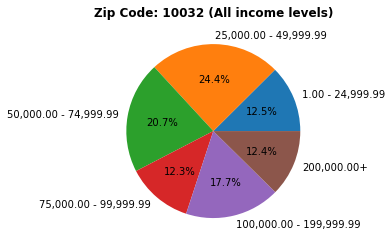

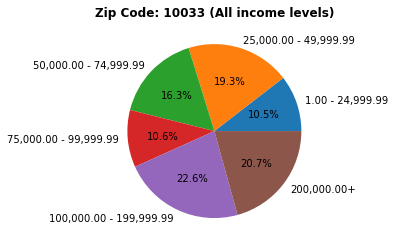

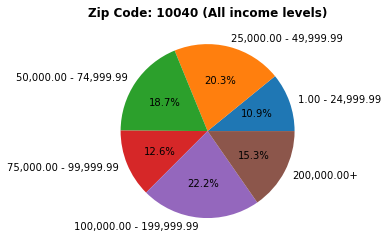

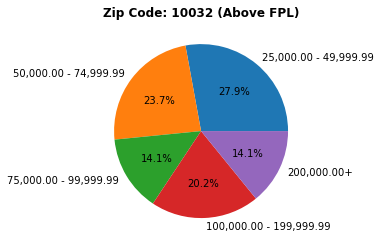

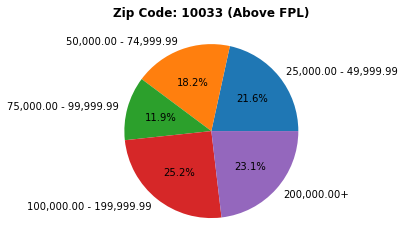

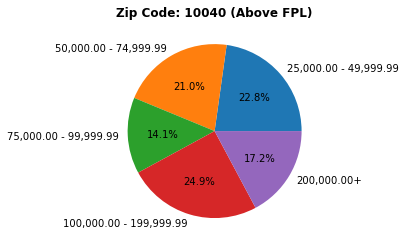

In [108]:
# Pie charts for Washington Heights Neighborhood Income breakdown.

# Labels
label_overall = ["1.00 - 24,999.99", "25,000.00 - 49,999.99", "50,000.00 - 74,999.99", "75,000.00 - 99,999.99", "100,000.00 - 199,999.99", "200,000.00+"]
label_aboveFPL = ["25,000.00 - 49,999.99", "50,000.00 - 74,999.99", "75,000.00 - 99,999.99", "100,000.00 - 199,999.99", "200,000.00+"]

# Avg Income based on df5[df5['Zip_Code'] == 10032.0]
avgincome_overall_zip_10032 = np.array([160166.0, 313716.0, 266643.0, 158672.0, 227289.0, 159101.0])
avgincome_aboveFPL_zip_10032 = np.array([313716.0, 266643.0, 158672.0, 227289.0, 159101.0])

# Avg Income based on df5[df5['Zip_Code'] == 10033.0]
avgincome_overall_zip_10033 = np.array([144194.0, 266286.0, 224772.0, 146636.0, 310831.0, 285419.0])
avgincome_aboveFPL_zip_10033 = np.array([266286.0, 224772.0, 146636.0, 310831.0, 285419.0])

# Avg Income based on df5[df5['Zip_Code'] == 10040.0]
avgincome_overall_zip_10040 = np.array([114235.0, 213246.0, 196428.0, 132397.0, 232808.0, 160938.0])
avgincome_aboveFPL_zip_10040 = np.array([213246.0, 196428.0, 132397.0, 232808.0, 160938.0])

# Spread out sections.
explode_overall = (0.5,0.4,0.3,0.2,0.1,0.0)
explode_aboveFPL = (0.4,0.3,0.2,0.1,0.0)

# Pie charts of 3 Zip Codes representing Washington Heights divided by all income dividends. 
# Pie chart - All income dividends Zip Code: 10032
plt.title('Zip Code: 10032 (All income levels)', fontweight = 'bold')
plt.pie(avgincome_overall_zip_10032, labels = label_overall, autopct='%.1f%%')
plt.show()

# Pie chart - All income dividends Zip Code: 10033
plt.title('Zip Code: 10033 (All income levels)', fontweight = 'bold')
plt.pie(avgincome_overall_zip_10033, labels = label_overall, autopct='%.1f%%')
plt.show()

# Pie chart - All income dividends FPL Zip Code: 10040
plt.title('Zip Code: 10040 (All income levels)', fontweight = 'bold')
plt.pie(avgincome_overall_zip_10040, labels = label_overall, autopct='%.1f%%')
plt.show()

# Pie charts of 3 Zip Codes representing Washington Heights divided by ABOVE FPL income dividends.
# Pie chart - Above FPL dividends Zip Code: 10032
plt.title('Zip Code: 10032 (Above FPL)', fontweight = 'bold')
plt.pie(avgincome_aboveFPL_zip_10032, labels = label_aboveFPL, autopct='%.1f%%')
plt.show()

# Pie chart - Above FPL dividends Zip Code: 10033
plt.title('Zip Code: 10033 (Above FPL)', fontweight = 'bold')
plt.pie(avgincome_aboveFPL_zip_10033, labels = label_aboveFPL, autopct='%.1f%%')
plt.show()

# Pie chart - Above FPL dividends Zip Code: 10040
plt.title('Zip Code: 10040 (Above FPL)', fontweight = 'bold')
plt.pie(avgincome_aboveFPL_zip_10040, labels = label_aboveFPL, autopct='%.1f%%')
plt.show()

In [109]:
# Jackson Heights Zip codes 11370, 11372
df5[df5['Zip_Code'] == 11370.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
2225,11370.0,"1.00 - 24,999.99",8350.0,2270.0,70254.0
2226,11370.0,"25,000.00 - 49,999.99",6840.0,2390.0,121185.0
2227,11370.0,"50,000.00 - 74,999.99",3790.0,1240.0,117463.0
2228,11370.0,"75,000.00 - 99,999.99",2270.0,720.0,94417.0
2229,11370.0,"100,000.00 - 199,999.99",3300.0,1110.0,181500.0
2230,11370.0,"200,000.00+",740.0,240.0,108949.0


In [110]:
df5[df5['Zip_Code'] == 11372.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
2233,11372.0,"1.00 - 24,999.99",21930.0,5960.0,181822.0
2234,11372.0,"25,000.00 - 49,999.99",16880.0,5870.0,312796.0
2235,11372.0,"50,000.00 - 74,999.99",9670.0,2980.0,316652.0
2236,11372.0,"75,000.00 - 99,999.99",5320.0,1480.0,243379.0
2237,11372.0,"100,000.00 - 199,999.99",7220.0,1950.0,460032.0
2238,11372.0,"200,000.00+",2260.0,650.0,298776.0


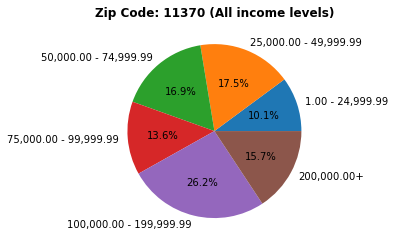

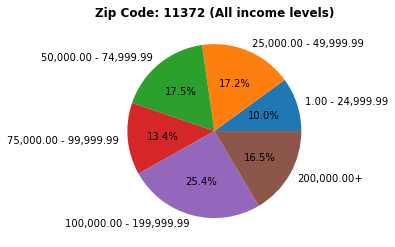

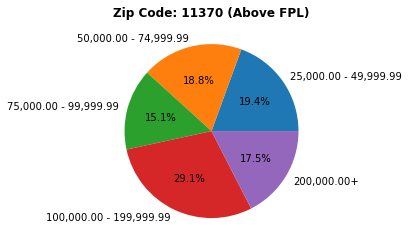

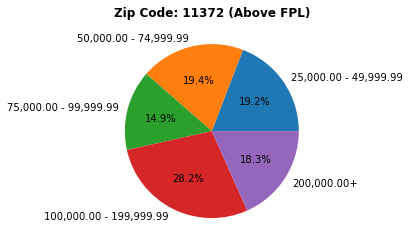

In [111]:
# Pie charts for Jackson Heights Neighborhood Income breakdown represented by Zip Codes: 11370 & 11372.

# Labels
label_overall = ["1.00 - 24,999.99", "25,000.00 - 49,999.99", "50,000.00 - 74,999.99", "75,000.00 - 99,999.99", "100,000.00 - 199,999.99", "200,000.00+"]
label_aboveFPL = ["25,000.00 - 49,999.99", "50,000.00 - 74,999.99", "75,000.00 - 99,999.99", "100,000.00 - 199,999.99", "200,000.00+"]

# Avg Income based on df5[df5['Zip_Code'] == 11370.0]
avgincome_overall_zip_11370 = np.array([70254.0, 121185.0, 117463.0, 94417.0, 181500.0, 108949.0])
avgincome_aboveFPL_zip_11370 = np.array([121185.0, 117463.0, 94417.0, 181500.0, 108949.0])

# Avg Income based on df5[df5['Zip_Code'] == 11372.0]
avgincome_overall_zip_11372 = np.array([181822.0, 312796.0, 316652.0, 243379.0, 460032.0, 298776.0])
avgincome_aboveFPL_zip_11372 = np.array([312796.0, 316652.0, 243379.0, 460032.0, 298776.0])


# Spread out sections.
explode_overall = (0.5,0.4,0.3,0.2,0.1,0.0)
explode_aboveFPL = (0.4,0.3,0.2,0.1,0.0)

# Pie charts of the 2 Zip Codes representing Jackson Heights divided by all income dividends. 
# Pie chart - All income dividends Zip Code: 11370
plt.title('Zip Code: 11370 (All income levels)', fontweight = 'bold')
plt.pie(avgincome_overall_zip_11370, labels = label_overall, autopct='%.1f%%')
plt.show()

# Pie chart - All income dividends Zip Code: 11372
plt.title('Zip Code: 11372 (All income levels)', fontweight = 'bold')
plt.pie(avgincome_overall_zip_11372, labels = label_overall, autopct='%.1f%%')
plt.show()


# Pie charts of the 2 Zip Codes representing Jackson Heights divided by ABOVE FPL income dividends. 
# Pie chart - Above FPL dividends Zip Code: 11370
plt.title('Zip Code: 11370 (Above FPL)', fontweight = 'bold')
plt.pie(avgincome_aboveFPL_zip_11370, labels = label_aboveFPL, autopct='%.1f%%')
plt.show()

# Pie chart - Above FPL dividends Zip Code: 11372
plt.title('Zip Code: 11372 (Above FPL)', fontweight = 'bold')
plt.pie(avgincome_aboveFPL_zip_11372, labels = label_aboveFPL, autopct='%.1f%%')
plt.show()


In [112]:
# Corona Zip code 11368
df5[df5['Zip_Code'] == 11368.0]

,Zip_Code,Size_of_AGI,Number_of_Individuals,Number_of_dependents,Average_Income
2209,11368.0,"1.00 - 24,999.99",42560.0,15090.0,319769.0
2210,11368.0,"25,000.00 - 49,999.99",31680.0,13450.0,502758.0
2211,11368.0,"50,000.00 - 74,999.99",13080.0,5280.0,354828.0
2212,11368.0,"75,000.00 - 99,999.99",5450.0,2100.0,200072.0
2213,11368.0,"100,000.00 - 199,999.99",3920.0,1410.0,205870.0
2214,11368.0,"200,000.00+",290.0,100.0,41854.0


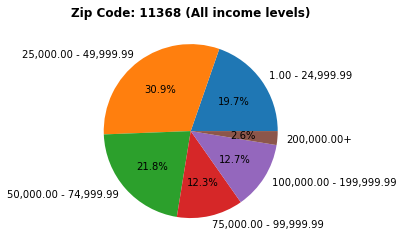

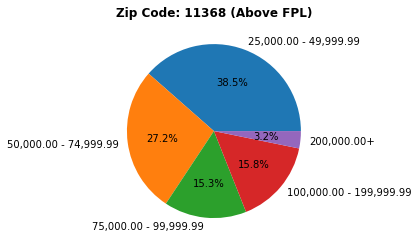

In [113]:
# Pie chart for Corona Neighborhood by Income breakdown that is represented only by zip code: 11368.

# Labels
label_overall = ["1.00 - 24,999.99", "25,000.00 - 49,999.99", "50,000.00 - 74,999.99", "75,000.00 - 99,999.99", "100,000.00 - 199,999.99", "200,000.00+"]
label_aboveFPL = ["25,000.00 - 49,999.99", "50,000.00 - 74,999.99", "75,000.00 - 99,999.99", "100,000.00 - 199,999.99", "200,000.00+"]

# Avg Income based on df5[df5['Zip_Code'] == 11368.0]
avgincome_overall_zip_11368 = np.array([319769.0, 502758.0, 354828.0, 200072.0, 205870.0, 41854.0])
avgincome_aboveFPL_zip_11368 = np.array([502758.0, 354828.0, 200072.0, 205870.0, 41854.0])

# Spread out sections.
explode_overall = (0.5,0.4,0.3,0.2,0.1,0.0)
explode_aboveFPL = (0.4,0.3,0.2,0.1,0.0)

# Pie charts - All income dividends Zip Code: 11368
plt.title('Zip Code: 11368 (All income levels)', fontweight = 'bold')
plt.pie(avgincome_overall_zip_11368, labels = label_overall, autopct='%.1f%%')
plt.show()

# Pie chart - Above FPL dividends Zip Code: 11368
plt.title('Zip Code: 11368 (Above FPL)', fontweight = 'bold')
plt.pie(avgincome_aboveFPL_zip_11368, labels = label_aboveFPL, autopct='%.1f%%')
plt.show()

In [114]:
# Determine Number of Restaurants by Top 3 Neighborhoods.
restaurant_list = pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results (1).csv")

In [115]:
# Washington Heights Quantity of Restaurants. Zip Codes: 10032, 10033, 10040

# Zip Code: 10032
wh_1 = restaurant_list[restaurant_list['ZIPCODE'] == 10032]['DBA'].count()

# Zip Code: 10033
wh_2 = restaurant_list[restaurant_list['ZIPCODE'] == 10033]['DBA'].count()

# Zip Code: 10040
wh_3 = restaurant_list[restaurant_list['ZIPCODE'] == 10032]['DBA'].count()

# Sum of Restaurants for Washington Heights.
wh_total = wh_1 + wh_2 + wh_3
wh_total

5624

In [116]:
# Jackson Heights Quantity of Restaurants. Zip Codes: 11370, 11372

# Zip Code: 11370
jh_1 = restaurant_list[restaurant_list['ZIPCODE'] == 11370]['DBA'].count()

# Zip Code: 11372
jh_2 = restaurant_list[restaurant_list['ZIPCODE'] == 11372]['DBA'].count()

# Sum of Restaurants for Jackson Heights.
jh_total = jh_1 + jh_2
jh_total

6371

In [117]:
# Corona Quantity of Restaurants. Zip Codes: 11368

# Zip Code: 11368
ca = restaurant_list[restaurant_list['ZIPCODE'] == 11368]['DBA'].count()
ca

4250

In [118]:
# Example
# df6_above_FPL.groupby(['Zip_Code'])['Average_Income'].sum().sort_values(ascending=False).head(3)
#.plot.bar(x='Zip_Code', y='Average_Income')
# plt.title('Top 3 Zip Codes with Highest Income Earners Above the FPL', fontweight='bold')
# plt.ylabel('Average Income (1e^7)', fontweight='bold')
# plt.xlabel('Zip Code', fontweight='bold')

# Code fails
#wh = pd.Series(['5624'])
#jh = pd.Series(['6371'])
# ca = pd.Series(['4250'])

# three_neighborhoods.set_index([pd.Index(['Washington Heights', 'Jackson Heights', 'Corona'], 'Qty of Restaurants')])

#three_neighborhoods = pd.concat([wh,jh,ca])
#three_neighborhoods.plot.bar(x=['Washington Heights', 'Jackson Heights', 'Corona'],y='Qty of Restaurants')
#plt.title('Quantity of Restaurants in Top 3 Populated Neighborhoods', fontweight='bold')
#plt.ylabel('Quanity of Restaurants', fontweight='bold')
#plt.xlabel('Neighborhoods', fontweight='bold')



In [119]:
import statistics

In [120]:
# Calculate Mean and Standard deviation of Percentage of Taxpayers earning at least $75,000+ in Washington Heights based on Zip Code values.

# 3 Zip Code percentages
wh_list = [42.4, 53.9, 50.1]

# Mean and Standard deviation formula
wh_mean = statistics.mean(wh_list)
wh_stdev = statistics.stdev(wh_list)

In [121]:
# Mean for Washington Heights.
wh_mean

48.8

In [122]:
# Standard deviation for Washington Heights. Then round to one decimal place.
round(wh_stdev, 1)

5.9

In [123]:
 # Calculate Mean and Standard deviation of 55.3, 55.5 for Jackson Heights.

# 3 Zip Code percentages
jh_list = [55.5, 55.3]

# Mean and Standard deviation formula
jh_mean = statistics.mean(jh_list)
jh_stdev = statistics.stdev(jh_list)

In [124]:
# Mean for Jackson Heights.
jh_mean

55.4

In [125]:
# Standard deviatiion for Jackson Heights.
round(jh_stdev, 1)

0.1

In [128]:
# Population Density for the 3 neighborhoods. Population Density = Population Size / Area

# Washington Heights: Population Size - 143879.0           Area - 1.655 mi² = 1059.2 acres
# Jackson Heights:    Population Size - 101848.0           Area -  0.46875 mi² = 300 acres
# Corona:             Population Size - 73822.0            Area - 0.72303125 mi² = 462.74 acres

print(143879.0/1059.2) # Population Density - Washington Heights
print(101848.0/300)    # Population Density - Jackson Heights
print(73822.0/462.5)  # Population Density - Corona

135.8374244712991
339.49333333333334
159.61513513513515


In [133]:
# Standard deviation for % of people of all incomes purchasing fast food on a daily basis.

# Income levels by people earning <= 130% FPL, >130% OR <=350% FPL, >350% FPL
incomebyFPL = [31.7, 36.4, 42.0]

# Calculation of the Standard deviation
incomebyFPL_stdev = statistics.stdev(incomebyFPL)
round(incomebyFPL_stdev, 1)

5.2

In [130]:
# Calculation of the mean for all income levels purchasing fast food on daily basis.
statistics.mean(incomebyFPL)

36.7

In [145]:
restaurant_list = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results (1).csv')
restaurant_list['CAMIS'].

0         41170643
1         41610426
2         41711813
3         41429907
4         41624260
            ...   
383909    41595300
383910    40393243
383911    50083618
383912    50038434
383913    41479685
Name: CAMIS, Length: 383914, dtype: int64

In [146]:
# Washington Heights restaurant total
sum_wh = 1743+2140+1246
sum_wh

5129

In [147]:
# Jackson Heights restaurant total
sum_jh = 403 + 6028
sum_jh

6431

In [ ]:
# Restaurant Density = restaurants divided by area (acres) for top 3 neighborhoods. Measures competition.

In [152]:
# Washington Heights Restaurant density
wh_restdens = 5129 / 1059.2
wh_restdens

4.842333836858006

In [153]:
# Jackson Heights Restaurant density
jh_restdens = 6431 / 300
jh_restdens

21.436666666666667

In [155]:
# Corona Restaurant density
c_restdens = 4261 / 462.74
c_restdens

9.20819466655141